# Narrative Flow of Men and Women



 ### Hypothesis:

Solidarity and social relations were different in the men and women sections of Birkenau; men and women recall them in different ways and in different context; solidarity and social bonds have different place in the narratives of men and women.

If the hypothesis is true:
- the story line (or narrative flow) leading to the discussion of sociability and solidarity is different in testimonies of men and women; the most likely sequences of topics (to be named narrative pathway) leading to topics describing solidarity and sociability are different
- different amount of traffic is going through  similar pathways leading to solidarity and sociability
- either different nodes (to be named priming topics) are preceding and following (to be named exit topics) topics of solidarity and sociability or if they are similar transitions to them happen at different intensitiy


Key research questions to be studied here:
- What are the major pathways between the memory of arrival to Birkenau and leaving from Birkenau?
- How are nodes related to solidarity (food sharing, aid giving) and social bonds (friends, social bonds, family) are situated along the major pathways? For women and men, are they peripheral or central? I.e. do a significant amount of narrative flow go towards them for men and women?
- What are the exit and priming topics for solidarity (food sharing, aid giving) and social bonds for men and women? What are those topics that prime them?
- How are topics of solidarity and social bonds related to survival explanations?
- How is friendship related to aid giving for men and for women? What are the transitory topics between them?
- Where did solidarity take place? In what contexts did solidarity take place?



## Summary of observations

In the dataset we can observe two general trends about the way women and men discuss acts of solidarity and social bonds.

Trend 1:

Both men and women discuss aid giving in the context of camp living conditions and forced labour. 

However, aid giving is more likely to follow living conditions for women than for men;(aid giving is more likely to follow forced labor for men than for women. This is supported by Observation 1).

The same can be observed with food sharing. Women rather discuss food sharing following living conditions, and men tend to discuss it following forced labour. (Supported by Observation 3).

Similarly, women tend to discuss friendship following living conditions more than men do. (Supported by Observation 5). Men tend to discuss friendship following forced labor more than women do. (Supported by Observation 5).

We can observe a similar pattern with social relations; women discuss it following living conditions whereas men following forced labor. (Supported by Observation 5 A).

Women are also more likely to connect preferential treatment with living conditions than men (Supported by Observation 24 A)

The trend that women are more likely to connect the living environment with social activity and solidarity than men is becoming much more stronger when we compare those men and women who did not work (supported by Observation 14, 14 A. and 14 B).

At the same time, social relations and friends remain more connected with forced labour for men who worked(supported by Observation 18). By contrast, in the narrative of women, friends and living conditions are more connected (supported by Observation 18A)

Men who worked are more likely to discuss food sharing in the context of forced labor than women; men who worked are more likely to discuss aid giving in the context of forced labor than women;(supported by Observation 21).

As a whole, women are more likely to discuss social activity and acts of solidarity in the context of living environment, whereas men in the context of forced labour. All this suggests that in women's barracks more social life and acts of solidarity took place thank in men barracks; by contrast men were more likely to experience solidarity and social bonds during forced labour and less in the living environment.

The fact that the social dynamics was different in the living environment of women and men is also supported by the following observation. Women are much more likely to connect the living environment with preferential treatment (Observation 24 A).

Trend 2.

Both women and men discuss solidarity and social bonds in the context of survival explanations.

However, women are more likely to connect social relations and aid giving (involving social relations, selection, friends in-between steps)  with survivor explanations. (Supported by Observation 8).

Social relations include also the Blockalteste; women are more likely to connect Blockalteste with survival explanations (supported by Observation 24).

Women who did not work are more likely to connect friendship and social relations with survival explanations (supported by Observation 13). 

Women are particularly more likely to attribute their survival of selections to social relations, friends and aid giving (supported by Observation 9).

In summary, social relations and acts of solidarity have larger weight in narrative paths leading to survival explanations for women. This signals  that women are more likely to attribute their survival to solidarity and social bonds. Again, this suggest that solitary and social bonds were more prevalent in the women sections.

## Load the necessary libraries and set up paths

In [303]:
import constants
import pandas as pd
import os
from IPython.display import display
import json
import pyemma
from tables import *
import sys; sys.path.insert(0, '..')
from markov_modelling.markov_utils import *
from collections import Counter
#from varname.helpers import Wrapper

In [304]:
input_directory = constants.output_data_markov_modelling
path = os.getcwd()
parent = os.path.abspath(os.path.join(path, os.pardir))
input_directory = parent +'/'+ constants.output_data_markov_modelling

## Load the relevant data

Load the complete women and men data 

In [305]:
data_set_1_w  = pyemma.load(input_directory+'complete_w'+'/'+'pyemma_model','simple')
data_set_1_complete  = pyemma.load(input_directory+'complete'+'/'+'pyemma_model','simple')
data_set_1_m = pyemma.load(input_directory+'complete_m'+'/'+'pyemma_model','simple')
data_set_1_complete = pyemma.load(input_directory+'complete'+'/'+'pyemma_model','simple')

Load the stationary probabilities

In [306]:
stationary_probs = pd.read_csv(input_directory+'/'+'complete'+'/'+'stationary_probs.csv')

Load data representing men and women who worked

In [307]:
data_set_1_w_work  = pyemma.load(input_directory+'work_w'+'/'+'pyemma_model','simple')
data_set_1_m_work = pyemma.load(input_directory+'work_m'+'/'+'pyemma_model','simple')

Load data representing men and women who did not  work

In [308]:
data_set_1_w_not_w  = pyemma.load(input_directory+'notwork_w'+'/'+'pyemma_model','simple')
data_set_1_m_not_w = pyemma.load(input_directory+'notwork_m'+'/'+'pyemma_model','simple')

Load the state index

In [309]:
features_df = pd.read_csv(parent+'/'+constants.segment_keyword_matrix_feature_index)

## Create functions for frequently used operations

### Calculate first mean passage time function

In [310]:
def calculate_mfpt(mm,source,target,topic_labels):
    source_indices = []
    for element in source:
        source_index_full = topic_labels.index(element)
        source_index_active = mm._full2active[source_index_full]
        source_indices.append(source_index_active)
    target_indices = []
    for element in target:
        target_index_full = topic_labels.index(element)
        target_index_active = mm._full2active[target_index_full]
        target_indices.append(target_index_active)
    print (source_indices)
    mfpt = pyemma.msm.tpt(mm,source_indices,target_indices).mfpt
    print (mfpt)

### Print paths functions

In [311]:
def print_paths(flux_w,max_length=None):
    for path in flux_w:
        if max_length is not None:
            if len(path.split('-'))<=max_length:
                print (path + ':' + str(flux_w[path]))
                print ('\n')
        else:
            print (path + ':' + str(flux_w[path]))
            print ('\n')

In [312]:
def print_similar_paths(flux_w,flux_m,max_length=None,show=True):
    all_paths = []
    for path in flux_w:
        if max_length is not None:
            if len(path.split('-'))<=max_length:
                all_paths.append(path)
        else:
            all_paths.append(path)
    for path in flux_m:
        if max_length is not None:
            if len(path.split('-'))<=max_length:
                all_paths.append(path)
        else:
            all_paths.append(path)
    counts = Counter(all_paths)

    dup_paths = [path for path in all_paths  if counts[path] > 1]
    dup_paths = set(dup_paths)
    if show:
        for path in dup_paths:
            print (path)
            print ('Women: '+str(flux_w[path]))
            print ('Men: '+str(flux_m[path]))
            print ('\n')
    else:
        result = []
        for path in dup_paths:
            
            result.append([path,flux_w[path],flux_m[path]])
        return result


In [313]:
from tqdm.notebook import trange, tqdm
def identify_paths_with_substantial_difference(states,model_1,model_2,ratio=1.5):
    
    flux = 0.6
    
    for i in trange(len(states)):
        story_start = states[i]
        for target in states:
            try:
                if target == story_start:
                    continue
                else:
                    story_end = target
                    flux_1 = calculate_flux(model_1,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

                    flux_2 = calculate_flux(model_2,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
                    result=print_similar_paths(flux_1,flux_2,max_length=3,show=False)
                    for element in result:
                        if ((element[1]/element[2])>ratio) or ((element[2]/element[1])>ratio):
                            print (element[0])
                            print (element[1])
                            print (element[2])
            except:
                pass

In [314]:
def get_inoutgoing_probabilities(msm, central_topics, context_topics, n_lag=1, reduce_to_active=False):
    """
    Compute cumulative probabilities from a context of topics into and out of a central topic.
    
    :param msm: pyemma.msm.MarkovStateModel
    :param central_topics: list of topics at the "center", to evaluate incoming and outgoing probablity from/to
    :param context_topics: list of topics to consider as start/end states into which/from which probability to
    central_topics is computed
    :param n_lag: int for transition matrix power (time step of output)
    :param reduce_to_active: bool; if True, reduces context_topics to the subset that is in the active set.
    """

    # get indices
    idx_context = features_df[features_df.KeywordLabel.isin(context_topics)].index
    idx_central = features_df[features_df.KeywordLabel.isin(central_topics)].index
    
    # check that central topic is in active set:
    assert np.all(np.in1d(idx_central, msm.active_set))
    
    # either check if the same is true for context topics or reduce them to the sub-set that is in active set
    if not reduce_to_active:
        assert np.all(np.in1d(idx_context, msm.active_set)), 'not in active set' + str(np.array(context_topics)[~np.in1d(idx_context, msm.active_set)])
    else:
        idx_context = idx_context[np.in1d(idx_context, msm.active_set)]
        
    # map indices to msm active set
    idx_context = msm._full2active[idx_context]
    idx_central = msm._full2active[idx_central]

    # matrix-power the transition matrix to estimate transition probabilities for higher lag times
    t = np.linalg.matrix_power(msm.transition_matrix, n_lag)
    
    # probability of following state is computed from transition matrix row
    out_prob = t[np.ix_(idx_central, idx_context)].sum()
    
    # probability of last state is computed from row-normalized transposed transition matrix
    t_t = t.T / t.T.sum(axis=1, keepdims=True)
    assert msmtools.analysis.is_transition_matrix(t_t)
    
    in_prob = t_t[np.ix_(idx_central, idx_context)].sum()
    return in_prob, out_prob

def plot_inoutgoing_probabilities(probs_w, probs_m, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    lbls = ['preceding','following']
    linestyles = ['-', ':']
    numerator = 0
    for _pw, _pm, lbl, linestyle in zip(probs_w.T, probs_m.T, lbls, linestyles):
        print (numerator)
        if numerator == 0:
            numerator = numerator +1
            continue
        ax.plot(_msmlags, _pw, 'r'+linestyle,label='women',c="#ff7f0e")
        ax.plot(_msmlags, _pm, 'b'+linestyle,label='men', c="#1f77b4")
    ax.legend()
    ### unit is only minutes if MSM lagtime is 1
    ax.set_ylim(ymin=0,ymax=0.2)
    ax.set_xlabel('lag time (minutes)')
    ax.set_ylabel('(cumulative) probability')

### Load  the topic map

In [315]:
topic_map_directory = parent +'/'+constants.input_directory
topic_map = pd.read_csv(topic_map_directory+'feature_map_no_friends_no_food_sharing.csv')
topic_map_living_conditions = topic_map[topic_map['CoverTerm']=="living conditions"].KeywordLabel.to_list()

topic_map_living_condition = []
for element in topic_map[topic_map['CoverTerm']=="living conditions"].KeywordLabel.to_list():
    if 'camp' in element:
        topic_map_living_condition.append(' '.join(element.split(' ')[1:]))
    else:
        topic_map_living_condition.append(element)

In [316]:
topic_map_forced_labor = topic_map[topic_map['CoverTerm']=="forced labor"].KeywordLabel.to_list()

In [317]:
topic_map_forced_labor = [
 'farms',
 'forced labor',
 'forced labor companies',
 'forced labor conditions',
 'forced labor squads',
 'working life']

## Observation 1

### Qualitative description

Both men and women discuss aid giving in the following camp living conditions and forced labour, women are more likely to discuss it following camp living conditions. While men are more likely to discuss it following forced labour. 

For instance, the following pathway is present in both men and women testimonies but in testimonies of women (3.3%), more traffic is going through it than in testimonies of men(2%):

arrival-selections-intake procedures-living conditions-aid giving

Furthermore, the amount of traffic going through the following path is different for men (2.8) and women (4.4%) :

living conditions-aid giving

Similarly, more traffic is going through the following path for women (3 %) and men (0.8%):

living conditions-food-aid giving

Finally, when the direct path between forced labor and aid giving is examined then in case of men (11.357897171905313) more traffic is going than in case of women (9%):

forced labor-aid giving

### Quantitative evidence 1

In [318]:
story_start = 'arrival'
story_end = 'aid giving'
state_index = features_df.KeywordLabel.to_list()
flux = 1

In [319]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [320]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Print those paths where living conditions prime aid giving for women

In [321]:
result = []

for path in flux_w:
    # Get the state before end state
    penultimate_state = path.split('-')[-2]
    if penultimate_state in topic_map_living_condition:
        print (path)
        print (flux_w[path])
        print ('\n')
        result.append(flux_w[path])

arrival-selections-camp intake procedures-living conditions-aid giving
7.6266097112496105




Print the total amount of traffic going through these nodes

In [322]:
print (np.array(result).sum())

7.6266097112496105


Print those paths where living conditions prime aid giving for men

In [323]:
result = []

for path in flux_m:
    # Get the state before end state
    penultimate_state = path.split('-')[-2]
    if penultimate_state in topic_map_living_condition:
        print (path)
        print (flux_m[path])
        print ('\n')
        result.append(flux_m[path])

arrival-selections-camp intake procedures-living conditions-aid giving
4.9625232348683515




Print the total amount of traffic going through these nodes

In [324]:
print (np.array(result).sum())

4.9625232348683515


Print those paths where forced labor prime aid giving for women

In [325]:
result = []

for path in flux_w:
    penultimate_state = path.split('-')[-2]
    if penultimate_state in topic_map_forced_labor:
        print (path)
        print (flux_w[path])
        print ('\n')
        result.append(flux_w[path])

arrival-camp intake procedures-living conditions-forced labor-aid giving
6.22991854406854


arrival-camp intake procedures-forced labor-aid giving
1.124306373783657




Print the total amount of traffic going through these nodes

In [326]:
print (np.array(result).sum())

7.354224917852197


Print those paths where forced labor prime aid giving for men

In [327]:
result = []

for path in flux_m:
    penultimate_state = path.split('-')[-2]
    if penultimate_state in topic_map_forced_labor:
        print (path)
        print (flux_m[path])
        print ('\n')
        result.append(flux_m[path])

arrival-selections-camp intake procedures-tattoo-forced labor-aid giving
7.1606598956196095


arrival-camp intake procedures-living conditions-forced labor-aid giving
3.1028263449433613




Print the total amount of traffic going through these nodes

In [328]:
print (np.array(result).sum())

10.26348624056297


### Visualization

7 labels to show
9 labels to show


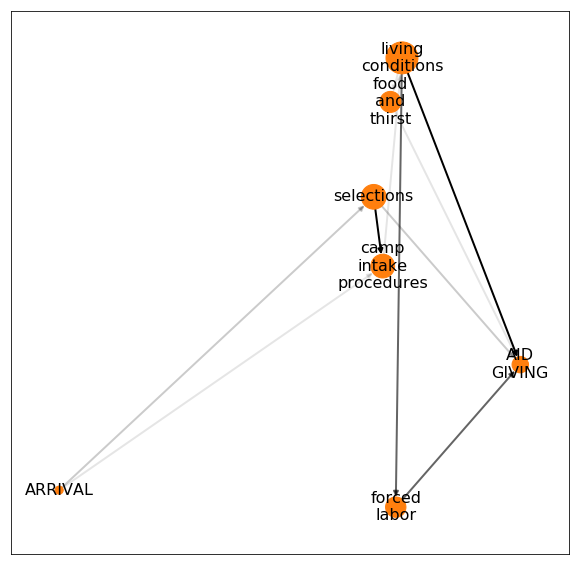

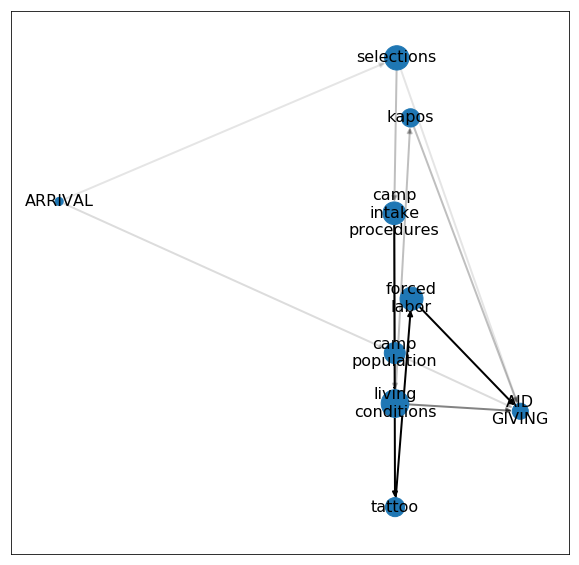

In [329]:
flux = 0.22
story_start = 'arrival'
story_end = 'aid giving'
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None,gender="w")
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None,gender="m")

### Quantitative evidence 2

In [330]:
story_start = 'living conditions'
story_end = 'aid giving'
state_index = features_df.KeywordLabel.to_list()

In [331]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.6)

In [332]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.6)

Print the most important pathways for women

In [333]:
print_paths(flux_w,max_length=3)

living conditions-aid giving:9.531953593526156


living conditions-forced labor-aid giving:5.863588935775755


living conditions-food and thirst-aid giving:4.660169898821635


living conditions-selections-aid giving:4.40373753529969


living conditions-kapos-aid giving:3.843968990986169


living conditions-camp population-aid giving:3.6756229646270557


living conditions-family-aid giving:3.2590201537977066


living conditions-adaptation methods-aid giving:2.8519226450213435


living conditions-social bonds-aid giving:2.5477067063145653


living conditions-mass murder awareness-aid giving:2.4922845738782677


living conditions-transfer-aid giving:2.309137094209141


living conditions-departure-aid giving:2.195739628442054


living conditions-violence-aid giving:2.0220861700470514


living conditions-Appell-aid giving:1.8409975744025215


living conditions-clothing-aid giving:1.637867674269513


living conditions-perpetrators-aid giving:1.5241315592607156


living conditions-diseases-ai

Print the most important pathways for men

In [334]:
print_paths(flux_m,max_length=3)

living conditions-aid giving:6.530244598430613


living conditions-forced labor-aid giving:6.41085289665382


living conditions-camp population-aid giving:4.267522203155086


living conditions-kapos-aid giving:4.053106132821475


living conditions-food and thirst-aid giving:3.1446270549199364


living conditions-adaptation methods-aid giving:3.134373748259832


living conditions-selections-aid giving:2.957323914934059


living conditions-departure-aid giving:2.635674782253119


living conditions-mass murder awareness-aid giving:2.5354126932692145


living conditions-family-aid giving:2.3313362170987872


living conditions-transfer-aid giving:2.253247111299896


living conditions-violence-aid giving:2.152602070891152


living conditions-social bonds-aid giving:2.1379892381265324


living conditions-Appell-aid giving:1.39969591193226


living conditions-perpetrators-aid giving:1.2727998545174235


living conditions-clothing-aid giving:1.2499629485643824


living conditions-psychological 

Print similar pathways

In [335]:
print_similar_paths(flux_w,flux_m)

living conditions-aid giving
Women: 9.531953593526156
Men: 6.530244598430613


living conditions-Appell-aid giving
Women: 1.8409975744025215
Men: 1.39969591193226


living conditions-family-aid giving
Women: 3.2590201537977066
Men: 2.3313362170987872


living conditions-departure-aid giving
Women: 2.195739628442054
Men: 2.635674782253119


living conditions-mass murder awareness-aid giving
Women: 2.4922845738782677
Men: 2.5354126932692145


living conditions-camp population-aid giving
Women: 3.6756229646270557
Men: 4.267522203155086


living conditions-social bonds-aid giving
Women: 2.5477067063145653
Men: 2.1379892381265324


living conditions-selections-aid giving
Women: 4.40373753529969
Men: 2.957323914934059


living conditions-adaptation methods-aid giving
Women: 2.8519226450213435
Men: 3.134373748259832


living conditions-forced labor-aid giving
Women: 5.863588935775755
Men: 6.41085289665382


living conditions-food and thirst-aid giving
Women: 4.660169898821635
Men: 3.144627054

### Visualize

4 labels to show
5 labels to show


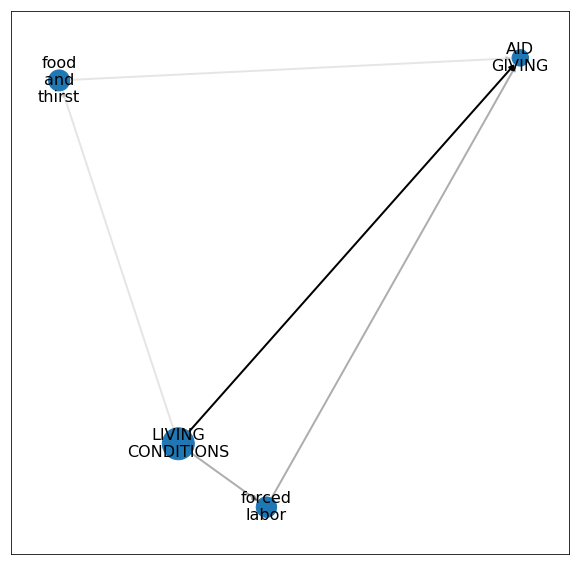

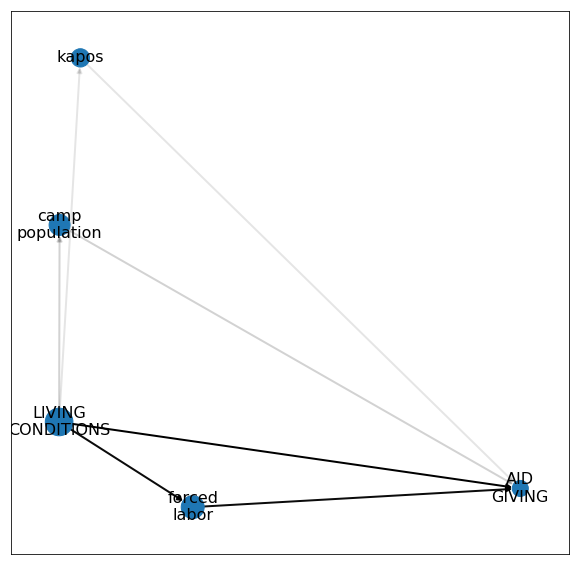

In [336]:
flux=0.2
story_start = 'living conditions'
story_end = 'aid giving'
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

### Quantitative evidence 2

In [337]:
story_start = 'forced labor'
story_end = 'aid giving'
state_index = features_df.KeywordLabel.to_list()

In [338]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.8)

In [339]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.8)

Print most important path for women

In [340]:
print_paths(flux_w,max_length=2)

forced labor-aid giving:12.365399674631384




Print most important path for men

In [341]:
print_paths(flux_m,max_length=2)

forced labor-aid giving:15.498589303073546




### Quantitative evidence 3

Aid giving is more likely to follow forced labor for men than for women.

0
1


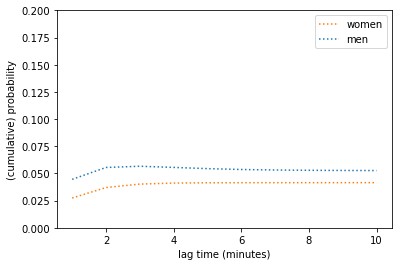

In [342]:
_msmlags = np.arange(1, 11)

#somehow there are topics that are not present in the feature dataframe. exclude those.
_topic_map_forced_labor = features_df[features_df.KeywordLabel.isin(topic_map_forced_labor)].KeywordLabel.tolist()

# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, ['aid giving','food sharing'], _topic_map_forced_labor, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, ['aid giving','food sharing'], _topic_map_forced_labor, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)
plt.savefig('Figure_4_solidarity_following_forced_labor.png')

In [343]:
probs_w

array([[0.0109669 , 0.02737868],
       [0.01136459, 0.03703916],
       [0.01081364, 0.04019876],
       [0.01021527, 0.04114421],
       [0.00976388, 0.04140081],
       [0.00946629, 0.04146768],
       [0.00928304, 0.04149052],
       [0.00917415, 0.0415047 ],
       [0.00911042, 0.04151604],
       [0.00907311, 0.04152459]])

Aid giving is more likely to follow living conditions for women than for men.

0
1


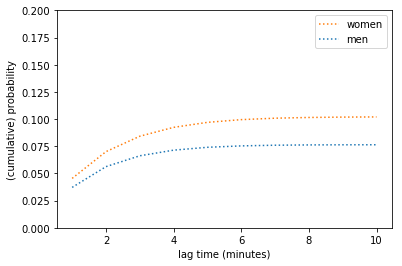

In [344]:
_msmlags = np.arange(1, 11)

#somehow there are topics that are not present in the feature dataframe. exclude those.
_topic_map_living_conditions = features_df[features_df.KeywordLabel.isin(topic_map_living_conditions)].KeywordLabel.tolist()

# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags
                             .shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, ['aid giving','food sharing'], _topic_map_living_conditions, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, ['aid giving','food sharing'], _topic_map_living_conditions, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)
plt.savefig('Figure_4_solidarity_following_living_conditions.png')

## Observation 2

### Qualitative description

As above, a key topic that follows the discussion of aid giving is forced labour. However, this has different weight in the narratives of men and women. Men are more likely to discuss forced labour following aid giving. By contrast, women are more likely to discuss housing and living conditions.

The traffic going through the following two paths are different for men and women.

aid giving-forced labor <br/>
Women: 5.892215934536441 <br/>
Men: 9.179672557709363<br/>

aid giving-living conditions <br/>
Women: 4.989195032183169 <br/>
Men: 3.940806972832768 <br/>




### Quantitative evidence 1

In [345]:
story_start = 'aid giving'
story_end = 'departure'
flux = 1

In [346]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [347]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Print those paths where forced labor follow aid giving for women

In [348]:
result = []

for path in flux_w:
    if len(path.split('aid giving-forced labor-'))>1:
        print (path)
        print (flux_w[path])
        print ('\n')
        result.append(flux_w[path])

aid giving-forced labor-departure
2.9206107882114645


aid giving-forced labor-perpetrators-camp intake procedures-living conditions-food and thirst-selections-loved ones' contacts-departure
0.8552649565196189


aid giving-forced labor-camp population-selections-camp intake procedures-living conditions-camp procedures-departure
0.6366054010855969


aid giving-forced labor-psychological reactions-testimony sharing-departure
0.01131931918372575


aid giving-forced labor-psychological reactions-living conditions-orchestras-creative activity-departure
0.0019328244435230933




Print the total amount of traffic going through these nodes

In [349]:
print (np.array(result).sum())

4.425733289443929


Print those paths where forced labor follow aid giving for men

In [350]:
result = []

for path in flux_m:
    if len(path.split('aid giving-forced labor-'))>1:
        print (path)
        print (flux_m[path])
        print ('\n')
        result.append(flux_m[path])

aid giving-forced labor-departure
3.3453993733179024


aid giving-forced labor-food acquisition-departure
1.3391617163390863


aid giving-forced labor-food and thirst-adaptation methods-departure
1.3147395487232305


aid giving-forced labor-awareness-departure
1.114504732283695


aid giving-forced labor-corpses-mass murder awareness-education-departure
0.12116903769410664




Print the total amount of traffic going through these nodes

In [351]:
print (np.array(result).sum())

7.234974408358021


Print those paths where living conditions follow aid giving for women

In [352]:
result = []

for path in flux_w:
    if len(path.split('aid giving-living conditions-'))>1 or len(path.split('aid giving-housing conditions-'))>1:
        result.append(flux_w[path])
        print (path)
        print (flux_w[path])
        print ('\n')
print (np.array(result).sum())

aid giving-living conditions-selections-departure
5.695509829505355


aid giving-living conditions-Appell-departure
1.3728319954202324


aid giving-living conditions-forced labor-adaptation methods-departure
0.5227216901554489


7.591063515081036


Print the total amount of traffic going through these nodes

In [353]:
print (np.array(result).sum())

7.591063515081036


Print those paths where living conditions follow aid giving for men

In [354]:
result = []

for path in flux_m:
    if len(path.split('aid giving-living conditions-'))>1 or len(path.split('aid giving-housing conditions-'))>1:
        result.append(flux_m[path])
        print (path)
        print (flux_m[path])
        print ('\n')

aid giving-living conditions-food and thirst-departure
4.0298996539604195


aid giving-living conditions-transfer-departure
2.132936452471857


aid giving-living conditions-crematoria-psychological reactions-adaptation methods-tattoo-family-loved ones' fates-survival explanations-departure
0.1541850004719002


aid giving-living conditions-adaptation methods-perpetrators-arrival-selections-twins-departure
0.0009253340223280403


aid giving-living conditions-adaptation methods-camp intake procedures-clothing-loved ones' contacts-loved ones' fates-departure
0.0002407808542939239


aid giving-living conditions-adaptation methods-tattoo-killings-Holocaust faith issues-transfer-liberation-departure
7.883135383843114e-06




Print the total amount of traffic going through these nodes

In [355]:
print (np.array(result).sum())

6.318195104916182


### Visualization

7 labels to show
10 labels to show


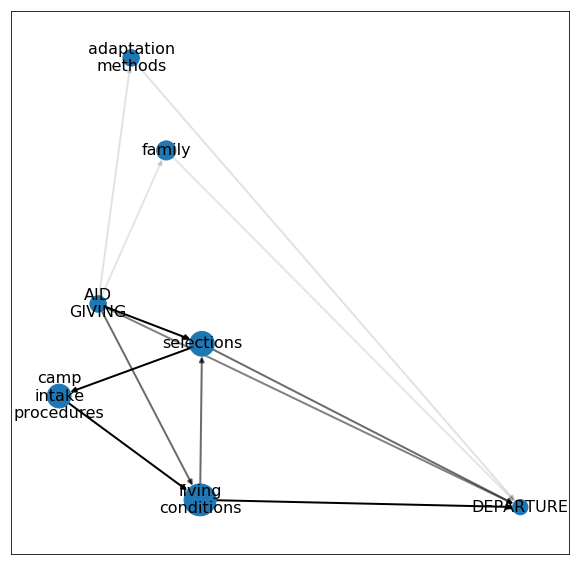

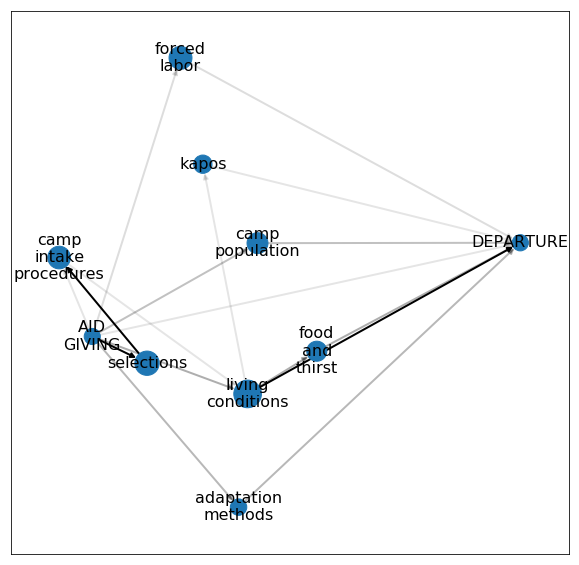

In [356]:
flux = 0.25
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

### Quantitative evidence 2

In [357]:
story_start = 'aid giving'
story_end = 'living conditions'

In [358]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)

Print the amount of traffic going between them for women and men

In [359]:
print_similar_paths(flux_w,flux_m,max_length=2)

aid giving-living conditions
Women: 9.77664764072487
Men: 8.41907659389596




In [360]:
story_start = 'aid giving'
story_end = 'forced labor'
state_index = features_df.KeywordLabel.to_list()

In [361]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)

In [362]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)

Print the amount of traffic going between them for women and men

In [363]:
print_similar_paths(flux_w,flux_m,max_length=3)

aid giving-forced labor
Women: 7.605634025589571
Men: 11.095068986305874


aid giving-violence-forced labor
Women: 2.214050698579202
Men: 2.332987409123726


aid giving-adaptation methods-forced labor
Women: 3.348721767139025
Men: 1.8976834232909832


aid giving-kapos-forced labor
Women: 2.5365075845475045
Men: 3.0805196587085377


aid giving-mass murder awareness-forced labor
Women: 2.36139564909375
Men: 2.3334625404415763


aid giving-camp population-forced labor
Women: 3.150136313834551
Men: 4.096425613651621


aid giving-social bonds-forced labor
Women: 2.2852201555709377
Men: 1.7963442680060895




### Quantitative evidence 3

0
1


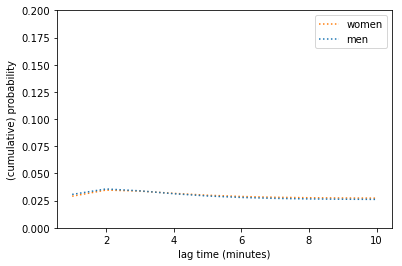

In [364]:
_msmlags = np.arange(1, 11)

#somehow there are topics that are not present in the feature dataframe. exclude those.
#_topic_map_forced_labor = features_df[features_df.KeywordLabel.isin(topic_map_forced_labor)].KeywordLabel.tolist()

# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, ['forced labor'], ['aid giving'],
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, ['forced labor'], ['aid giving'], 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

0
1


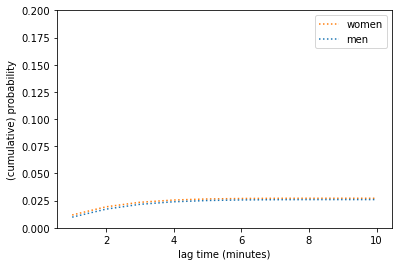

In [365]:
_msmlags = np.arange(1, 11)

#somehow there are topics that are not present in the feature dataframe. exclude those.
#_topic_map_forced_labor = features_df[features_df.KeywordLabel.isin(topic_map_forced_labor)].KeywordLabel.tolist()

# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, ['living conditions'], ['aid giving'],
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, ['living conditions'], ['aid giving'], 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 3

### Qualitative description

Similarly to aid giving, women are more likely to discuss food sharing following living conditions, whereas men discuss it following forced labour. 

The total amount of traffic going through the following two paths for women is 11,8 % and for men it is 8.8%:

living conditions-food-food sharing

living conditions-food sharing

At the same time, the total traffic going through the following paths is different for men (18.3%) and women 15.2):

forced labor-food sharing

forced labor-food-food sharing


### Quantitative evidence 1

story_start = 'arrival'
story_end = 'food sharing'
flux = 1

flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Print those paths where living and housing conditions prime food sharing for women

result = []

for path in flux_w:
    if len(path.split('-living conditions-food sharing'))>1 or len(path.split('-housing conditions-food sharing'))>1:
        print (path)
        print (flux_w[path])
        print ('\n')
        result.append(flux_w[path])

Print the total amount of traffic going through these nodes

print (np.array(result).sum())

Print those paths where living and housing conditions prime food sharing for men

result = []

for path in flux_m:
    if len(path.split('-living conditions-food sharing'))>1 or len(path.split('-housing conditions-food sharing'))>1:
        result.append(flux_m[path])
        print (path)
        print (flux_m[path])
        print ('\n')

Print the total amount of traffic going through these nodes

print (np.array(result).sum())

Print those paths where forced labor prime food sharing for women

result = []

for path in flux_w:
    if len(path.split('-forced labor-food sharing'))>1:
        print (path)
        print (flux_w[path])
        print ('\n')
        result.append(flux_w[path])

Print the total amount of traffic going through these nodes

print (np.array(result).sum())

Print those paths where forced labor prime food sharing for men

result = []

for path in flux_m:
    if len(path.split('-forced labor-food sharing'))>1:
        print (path)
        print (flux_m[path])
        print ('\n')
        result.append(flux_m[path])

Print the total amount of traffic going through these nodes

print (np.array(result).sum())

### Visualization

flux = 0.2
story_start = 'arrival'
story_end = 'food sharing'
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

### Quantitative evidence 2

story_start = 'forced labor'
story_end = 'food sharing'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)

flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)

print_similar_paths(flux_w,flux_m,max_length=3)

story_start = 'living conditions'
story_end = 'food sharing'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)

flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)

print_similar_paths(flux_w,flux_m,max_length=3)

### Quantitative evdience 3

Food sharing is more likely to follow forced labor for men than for women.

_msmlags = np.arange(1, 11)

topic_1 = ["food sharing"]
topic_2  = topic_map_forced_labor
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

Food sharing is more likely to follow camp living conditions for women than for men.

_msmlags = np.arange(1, 11)

topic_1 = ["food sharing"]
topic_2  = topic_map_living_conditions
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 4

### Qualitative description

In testimonies of men and women, both living conditions and forced labour are discussed following food sharing. There is no difference in terms of the amount of the traffic that goes from food sharing to forced labour.

food sharing-forced labor <br/>
Women: 5.60066015579362  <br/>
Men: 5.661811177443069  <br/>

However, in case of men more traffic is going from food sharing towards living conditions:

food sharing-living conditions <br/>
Women: 4.612779648936039  <br/>
Men: 5.4796159931673705  <br/>

### Quantitative evidence 1

story_start = 'food sharing'
story_end = 'departure'
flux = 1

flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Print those paths where forced labor follow food sharing for women

result = []

for path in flux_w:
    next_state = path.split('-')[1]
    if next_state =='forced labor':
        print (path)
        print (flux_w[path])
        print ('\n')
        result.append(flux_w[path])

Print the total amount of traffic going through these nodes

print (np.array(result).sum())

Print those paths where forced labor follow food sharing for men

result = []

for path in flux_m:
    next_state = path.split('-')[1]
    if next_state in topic_map_forced_labor:
        print (path)
        print (flux_m[path])
        print ('\n')
        result.append(flux_m[path])

Print the total amount of traffic going through these nodes

print (np.array(result).sum())

Print those paths where living conditions follow food sharing for women

result = []

for path in flux_w:
    next_state = path.split('-')[1]
    if next_state =='living conditions':
        result.append(flux_w[path])
        print (path)

Print the total amount of traffic going through these nodes

print (np.array(result).sum())

Print those paths where living conditions follow food sharing for men

result = []

for path in flux_m:
    next_state = path.split('-')[1]
    if next_state =="living conditions":
        result.append(flux_m[path])
        print (path)

Print the total amount of traffic going through these nodes

print (np.array(result).sum())

### Visualization

flux = 0.19
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

### Quantitative evidence 2

story_start = 'food sharing'
story_end = 'forced labor'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)

flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)

print_similar_paths(flux_w,flux_m,max_length=2)

story_start = 'food sharing'
story_end = 'living conditions'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)

flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)

print_similar_paths(flux_w,flux_m,max_length=3)

## Observation 5 A

### Qualitative description

Women tend to discuss social bonds following living environment, whereas men tend to discuss it following forced labour. Different amount of traffic is going through the following paths in case of women (5.3 %) and men (4.3 %):

living conditions-social relations

Different amount of traffic is going through the following paths in case of women (4.6 %) and men (8.6 %):

forced labor-social relations

Finally, food is an key transitionary topic between social relations and living environment for women:

living conditions-food-social relations <br/>
Women: 6.434011448725096<br/>
Men: 3.5924098744045265<br/>

Similarly, food is an key transitionary topic between forced labour and living environment for women:

forced labor-food-social relations<br/>
Women: 5.672980573742698<br/>
Men: 3.5486202551343533<br/>

## Quantitative evidence 1

In [366]:
story_start = 'arrival'
story_end = 'social bonds'
flux = 1
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Print those paths where forced labor prime social relations for women

In [367]:
result = []

for path in flux_w:
    if len(path.split('-forced labor-social bonds'))>1:
        print (path)
        print (flux_w[path])
        print ('\n')
        result.append(flux_w[path])

arrival-camp intake procedures-living conditions-forced labor-social bonds
3.6554358251197945




Print the total amount of traffic going through these nodes

In [368]:
print (np.array(result).sum())

3.6554358251197945


Print those paths where forced labor prime social relations for men

In [369]:
result = []

for path in flux_m:
    if len(path.split('-forced labor-social bonds'))>1:
        print (path)
        print (flux_m[path])
        print ('\n')
        result.append(flux_m[path])

arrival-selections-camp intake procedures-tattoo-forced labor-social bonds
6.748655065682128




Print the total amount of traffic going through these nodes

In [370]:
print (np.array(result).sum())

6.748655065682128


Print those paths where living conditions prime social relations for women

In [371]:
result = []

for path in flux_w:
    if len(path.split('living conditions-social bonds'))>1:
        result.append(flux_w[path])
        print (path)
        print (flux_w[path])
        print ('\n')

arrival-selections-camp intake procedures-living conditions-social bonds
14.281213970910503




Print the total amount of traffic going through these nodes

In [372]:
print (np.array(result).sum())

14.281213970910503


Print those paths where living conditions prime social relations for men

In [373]:
result = []

for path in flux_m:
    if len(path.split('living conditions-social bonds'))>1:
        result.append(flux_m[path])
        print (path)
        print (flux_m[path])
        print ('\n')

arrival-selections-camp intake procedures-living conditions-social bonds
9.58462666108073




Print the total amount of traffic going through these nodes

In [374]:
print (np.array(result).sum())

9.58462666108073


### Quantitative evidence 2

In [375]:
story_start = 'living conditions'
story_end = 'social bonds'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.6)

In [376]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.6)

In [377]:
print_similar_paths(flux_w,flux_m,max_length=4)

living conditions-selections-camp intake procedures-social bonds
Women: 2.088998880182361
Men: 3.5152253127280266


living conditions-food and thirst-social bonds
Women: 6.9567520078826846
Men: 4.547093730467696


living conditions-family-social bonds
Women: 2.5062644518990527
Men: 2.0790112920850663


living conditions-Appell-social bonds
Women: 2.436285567382441
Men: 2.2106870505242173


living conditions-clothing-social bonds
Women: 2.066106300341016
Men: 1.3806622535565531


living conditions-mass murder awareness-social bonds
Women: 3.4701542034839803
Men: 2.247963226068194


living conditions-camp population-social bonds
Women: 3.4465250623952457
Men: 4.1065564947047335


living conditions-adaptation methods-social bonds
Women: 2.5320149449713547
Men: 2.9023039530677543


living conditions-transfer-social bonds
Women: 2.110203903454775
Men: 2.047300957503391


living conditions-forced labor-social bonds
Women: 3.6580217246944904
Men: 5.809399592323357


living conditions-violence

### Visualize

5 labels to show
7 labels to show


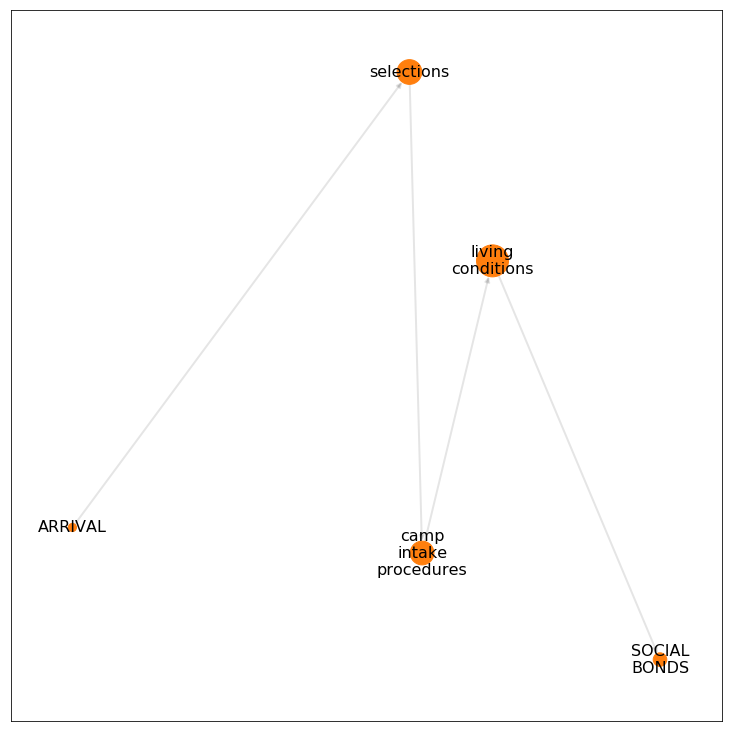

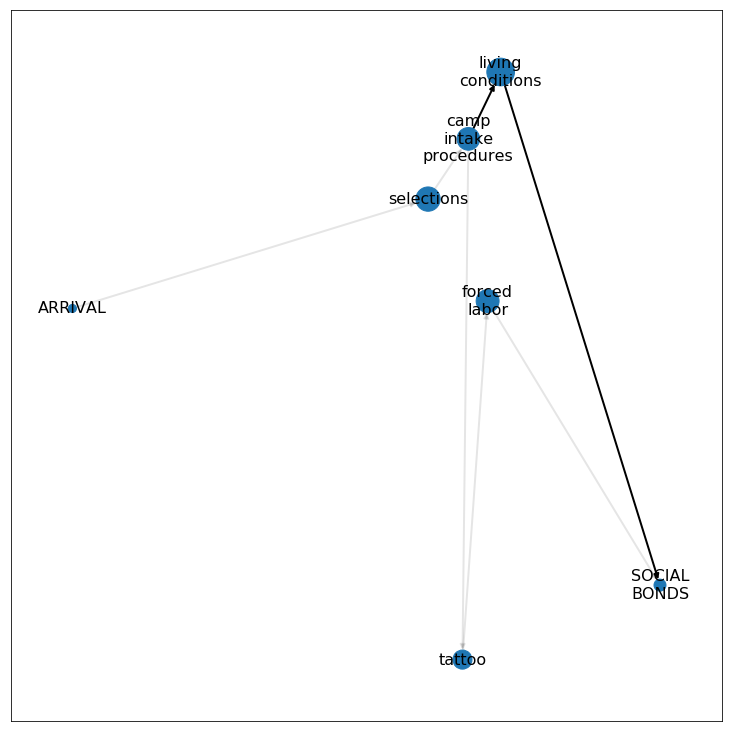

In [378]:
flux = 0.13
from markov_modelling.markov_utils import *
story_start = 'arrival'
story_end = 'social bonds'
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None,gender="w")
plt.tight_layout(pad=0.1)

plt.savefig("figure_5_w.png")
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None,gender="m")
plt.tight_layout(pad=0.1)
plt.savefig("figure_5_m.png")

In [379]:
story_start = 'forced labor'
story_end = 'social bonds'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.3)

In [380]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.3)

In [381]:
print_similar_paths(flux_w,flux_m,max_length=3)

forced labor-social bonds
Women: 5.387436494140925
Men: 8.794233707172484


forced labor-kapos-social bonds
Women: 3.8188794980638194
Men: 4.2185918406296405


forced labor-food and thirst-social bonds
Women: 5.961514317190159
Men: 4.462974747474542


forced labor-living conditions-social bonds
Women: 8.233655353076177
Men: 6.287017048407604


forced labor-camp population-social bonds
Women: 4.535802330070602
Men: 5.433100715632171




### Visualization

4 labels to show
4 labels to show


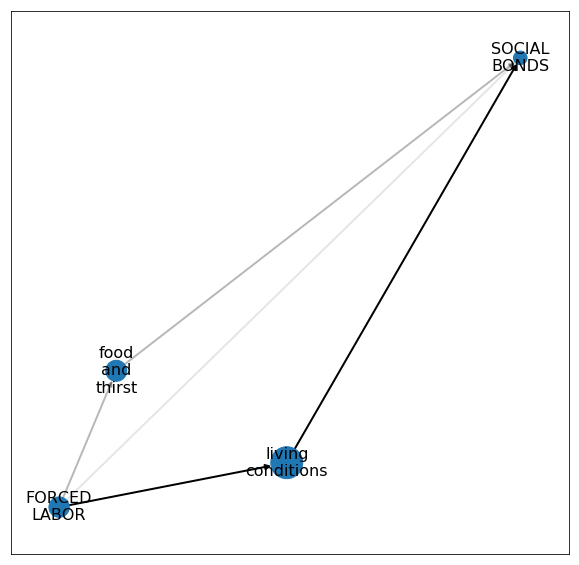

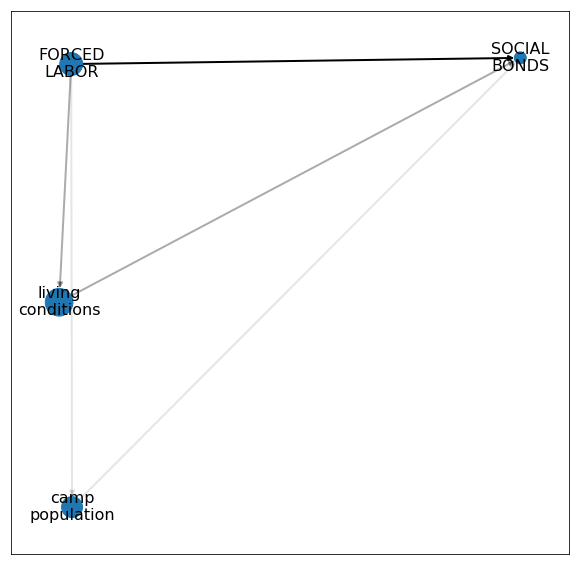

In [382]:
flux = 0.16
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

### Quantitative evdience 3

Social relations are more likely to follow forced labor for men than for women.

0
1


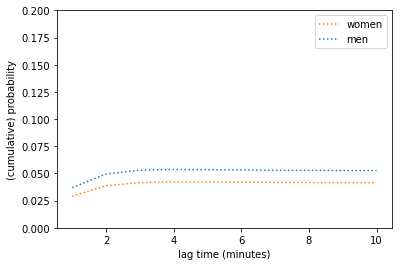

In [383]:
_msmlags = np.arange(1, 11)

topic_1 = ["social bonds"]
topic_2  = topic_map_forced_labor
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

Social relations are more likely to follow camp living conditions for women than for men.

0
1


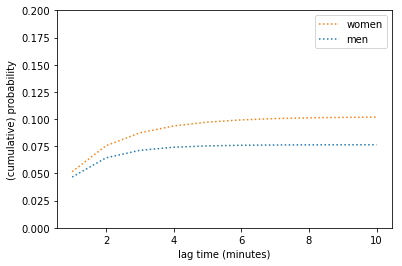

In [384]:
_msmlags = np.arange(1, 11)

topic_1 = ["social bonds"]
topic_2  = ["living conditions"]
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 5

### Qualitative description

In narratives of both women and men, the discussion of friendship tends to be preceded by the discussion of living environments and forced labor. For women,  the discussion of friendship followng living environment is stronger:

living conditions-friends <br/>
Women: 7.186269105921992 <br/>
Men: 4.987467244255548 <br/>

An important transitionary topic between living conditions and friends is food:

living conditions-food-friends <br/>
Women: 3.7173273244734077 <br/>
Men: 2.806933358478007 <br/>

But this is stronger for women.

Another important transitionary topic between them is camp adaptation methods, which is stronger for men:

living conditions-camp adaptation methods-friends <br/>
Women: 2.8453985144436293 <br/>
Men: 3.213141994177019 <br/>

For women and men, the traffic between forced labor and friends is equal:

forced labor-friends <br/>
Women: 5.134709271710951 <br/>
Men: 4.946899219077014 <br/>

But the probability of transition from forced labor to friends is higher for men.

### Quantitative evidence 1

story_start = 'arrival'
story_end = 'friends'
flux = 0.2
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

flux_w

flux_m

Print those paths where forced labor prime friends for women

result = []

for path in flux_w:
    if len(path.split('-forced labor-friends'))>1:
        print (path)
        print (flux_w[path])
        print ('\n')
        result.append(flux_w[path])

Print the total amount of traffic going through these nodes

print (np.array(result).sum())

Print those paths where forced labor prime aid giving for men

result = []

for path in flux_m:
    if len(path.split('-forced labor-friends'))>1:
        print (path)
        print (flux_m[path])
        print ('\n')
        result.append(flux_m[path])


Print the total amount of traffic going through these nodes

print (np.array(result).sum())

Print those paths where living conditions prime friends for women

result = []

for path in flux_w:
    if len(path.split('living conditions-friends'))>1:
        result.append(flux_w[path])
        print (path)
        print (flux_w[path])
        print ('\n')

Print the total amount of traffic going through these nodes

print (np.array(result).sum())

Print those paths where forced labor prime aid giving for men

result = []

for path in flux_m:
    if len(path.split('living conditions-friends'))>1:
        result.append(flux_m[path])
        print (path)
        print (flux_m[path])
        print ('\n')

Print the total amount of traffic going through these nodes

print (np.array(result).sum())

### Visualize

flux = 0.2
story_start = 'arrival'
story_end = 'friends'
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

### Quantitative evidence 1

story_start = 'living conditions'
story_end = 'friends'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.3)

flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.3)

print_similar_paths(flux_w,flux_m)

### Visualize it

flux = 0.2
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

### Quantitative evidence 2

story_start = 'forced labor'
story_end = 'friends'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.3)

story_start = 'living conditions'
story_end = 'friends'
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.3)

print_similar_paths(flux_w,flux_m)

### Quantitative evdience 3

Friends are more likely to follow forced labor for men than for women.

_msmlags = np.arange(1, 11)

topic_1 = ["friends","social relations"]
topic_2  = topic_map_forced_labor
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)
plt.savefig("figure_4_social_bonds_following_forced_labor.png")

Friends are more likely to follow camp living conditions for women than for men.

_msmlags = np.arange(1, 11)

topic_1 = ["friends","social relations"]
topic_2  = topic_map_living_conditions
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)
plt.savefig("figure_4_social_bonds_following_living_conditions.png")

## Observation 6

### Qualitative description

Women are more likely to discuss living conditions following friendship than man do. Similarly women are more likely to discuss forced laboru followng friendship:

friends-living conditions <br/>
Women: 3.535931711450818 <br/>
Men: 2.198317704062195 <br/>

For women food is an important transitionary topic:

friends-food-living conditions:3.5758882151694316


Similarly, women are much more likely to follow with forced labour after friendship:

friends-forced labor <br/>
Women: 7.431426222661657 <br/>
Men: 2.6768092638626446 <br/>

Aid giving is a more important transitionary topic between friends and forced labor:

friends-aid giving-forced labor <br/>
Women: 1.5338897117404788 <br/>
Men: 0.36132920515314015 <br/>

For women food is an important transitionary topic between friends and forced labor.

friends-food-forced labor:3.557599215626483 <br/>




## Quantitative evidence 1

story_start = 'friends'
story_end = 'departure'
flux = 1
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)


Print those paths where forced labor follow friends for women

result = []

for path in flux_w:
    if len(path.split('friends-forced labor-'))>1:
        print (path)
        print (flux_w[path])
        result.append(flux_w[path])

Print the total amount of traffic going through these nodes

print (np.array(result).sum())

Print those paths where forced labor follow friends for men

result = []

for path in flux_m:
    if len(path.split('friends-forced labor-'))>1:
        print (path)
        print (flux_m[path])
        result.append(flux_m[path])

Print the total amount of traffic going through these nodes

print (np.array(result).sum())

Print those paths where living conditions follow friends for women

result = []

for path in flux_w:
    if len(path.split('friends-living conditions-'))>1:
        print (path)
        print (flux_w[path])
        result.append(flux_w[path])

Print the total amount of traffic going through these nodes

print (np.array(result).sum())

Print those paths where living conditions follow friends for women

result = []

for path in flux_m:
    if len(path.split('friends-living conditions-'))>1:
        print (path)
        print (flux_m[path])
        result.append(flux_m[path])

Print the total amount of traffic going through these nodes

print (np.array(result).sum())

### Visualize

story_start = 'friends'
story_end = 'departure'

flux = 0.2
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

### Quantitative evidence 2

story_start = 'friends'
story_end = 'living conditions'
state_index = features_df.KeywordLabel.to_list()

flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=1)

flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=1)

Print the most important pathways for women

print_paths(flux_w,max_length=3)

Print the most important pathways for men

print_paths(flux_m,max_length=3)

Print similar pathways

print_similar_paths(flux_w,flux_m)

story_start = 'friends'
story_end = 'forced labor'
state_index = features_df.KeywordLabel.to_list()

flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=1)

flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=1)

Print the most important pathways for women

print_paths(flux_w,max_length=3)

Print the most important pathways for men

print_paths(flux_m,max_length=3)

print_similar_paths(flux_w,flux_m)

### Quantitative evdience 3

_msmlags = np.arange(1, 11)

topic_2 = ["friends"]
topic_1  = topic_map_forced_labor
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

_msmlags = np.arange(1, 11)

topic_2 = ["friends"]
topic_1  = topic_map_living_conditions
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, topic_1, topic_2, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 7

## Qualitative description

If we look at all possible narrative pathways that can connect arrival to and departure from Birkenau, we can see that a significant amount of traffic is going through aid giving  and social bonds. Their significance can be understood if they are compared to Appel. The amount of traffic going through friendship  and food sharing is less significant. 

In case of women, more traffic is going through these nodes, with an exception of aid giving:

•    social bonds: 3.47 %

•    aid giving: 2.46 %

•    friendship: 0.85 $

•    food sharing: 0.35 %

In case of men, less traffic is going through these nodes:

•.	 social bonds: 2.46 %

•    aid giving: 2.6 %

•    friendship: 0.24 %

•    food sharing: 0.29 %

#### Total traffic going through them in the complete dataset (men and women):

In [385]:
story_start = 'arrival'
story_end = 'departure'
flux = 1
flux_complete = calculate_flux(data_set_1_complete,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
#flux_complete_dataset_2 = calculate_flux(data_set_2_complete,features_df_2.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)


Calculate the total traffic going through social bonds

In [386]:
total_social_bonds = []
total_aid_giving = []
total_appell = []
total_friends = []
total_food_sharing = []
total_escapes = []

In [387]:
for i,element in enumerate(flux_complete):
    if 'social bonds' in element.split('-'):
        total_social_bonds.append(flux_complete[element])
print(np.array(total_social_bonds).sum())

3.2170012111852775


Calculate the total traffic going through aid giving

In [388]:
for i,element in enumerate(flux_complete):
    if 'aid giving' in element.split('-'):
        total_aid_giving.append(flux_complete[element])
print(np.array(total_aid_giving).sum())

5.14813611758712


Calculate the total traffic going through Appell

In [389]:
for i,element in enumerate(flux_complete):
    if 'Appell' in element.split('-'):
        total_appell.append(flux_complete[element])
print(np.array(total_appell).sum())

10.788214200303202


Calculate the total traffic going through escape

In [390]:
for i,element in enumerate(flux_complete):
    if 'escapes' in element.split('-'):
        total_escapes.append(flux_complete[element])
print(np.array(total_escapes).sum())

0.6714793717165076


Calculate the total traffic going through friendship

for i,element in enumerate(flux_complete):
    if 'friends' in element.split('-'):
        total_friends.append(flux_complete[element])
print(np.array(total_friends).sum())

Calculate the total traffic going through food sharing

for i,element in enumerate(flux_complete):
    if 'food sharing' in element.split('-'):
        total_food_sharing.append(flux_complete[element])
print(np.array(total_food_sharing).sum())

#### Total traffic going through them in the dataset of women

In [391]:
story_start = 'arrival'
story_end = 'departure'
flux = 1
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
#flux_w_dataset_2 = calculate_flux(data_set_2_w,features_df_2.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)


In [392]:
len(flux_w)

212

In [393]:
total_social_bonds = []
total_aid_giving = []
total_appell = []
total_friends = []
total_food_sharing = []

Calculate the total traffic going through social bonds

In [394]:
for i,element in enumerate(flux_w):
    if 'social bonds' in element.split('-'):
        total_social_bonds.append(flux_w[element])
print(np.array(total_social_bonds).sum())

3.980372754061781


Calculate the total traffic going through aid giving

In [395]:
for i,element in enumerate(flux_w):
    if 'aid giving' in element.split('-'):
        total_aid_giving.append(flux_w[element])
print(np.array(total_aid_giving).sum())

5.508638127990905


Calculate the total traffic going through friendship

for i,element in enumerate(flux_w):
    if 'friends' in element.split('-'):
        total_friends.append(flux_w[element])
print(np.array(total_friends).sum())

Calculate the total traffic going through food sharing

for i,element in enumerate(flux_w):
    if 'food sharing' in element.split('-'):
        total_food_sharing.append(flux_w[element])
        #print (element)
        #print (flux_w[element])
print(np.array(total_food_sharing).sum())

#### Total traffic going through them in the dataset of men

In [396]:
story_start = 'arrival'
story_end = 'departure'
flux = 1
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
#flux_m_dataset_2 = calculate_flux(data_set_2_m,features_df_2.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)


In [397]:
total_social_bonds = []
total_aid_giving = []
total_appell = []
total_friends = []
total_food_sharing = []



Calculate the total traffic going through social bonds

In [398]:
for i,element in enumerate(flux_m):
    if 'social bonds' in element.split('-'):
        total_social_bonds.append(flux_m[element])
print(np.array(total_social_bonds).sum())

1.6644740976182943


Calculate the total traffic going through aid giving

In [399]:
for i,element in enumerate(flux_m):
    if 'aid giving' in element.split('-'):
        total_aid_giving.append(flux_m[element])
print(np.array(total_aid_giving).sum())

4.448453603676021


Calculate the total traffic going through friendship

for i,element in enumerate(flux_m):
    if 'friends' in element.split('-'):
        total_friends.append(flux_m[element])
print(np.array(total_friends).sum())

Calculate the total traffic going through food sharing

total_food_sharing = []

for i,element in enumerate(flux_m):
    if 'food sharing' in element.split('-'):
        #print (element)
        #print (flux_m[element])
        total_food_sharing.append(flux_m[element])
print(np.array(total_food_sharing).sum())

## Observation 8

### Qualitative Description

In testimonies of women there are important narrative pathways that lead to the discussion of survival explanations and involve social bonds (friends and social relations) as states preceding survival explanations; in testimonies of men such paths have significantly less traffic (the ratio is more than 3 times for women)

At the same time, in testimonies of men, between aid giving and survival explanation there is slightly more traffic (ratio is 1.6 times).

The study of direct link has similar results:

aid giving-survival explanations <br/>
Women: 2.6696661754080866 <br/>
Men: 3.8067494674128137 <br/>

But in case of women social relations and friends are important transitionary topics:

aid giving-social relations-survival explanations:1.3752851611513381 <br/>
aid giving-friends-survival explanations:0.8100798985654745 <br/>

The amount of direct traffic between social relations and survival explanations is much larger for women:

social relations-survival explanations <br/>
Women: 3.3426904751901763 <br/>
Men: 0.6392835020909489 <br/>


With friends, there is slightly more traffic in case of men:

friends-survival explanations <br/>
Women: 1.9655525123995026 <br/>
Men: 2.17582398231009 <br/>



### Quantitative evidence 1

In [400]:
story_start = 'arrival'
story_end = 'survival explanations'

In [401]:
flux = 1
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Find social bonds preceding survivor explanation in women narratives

In [402]:
result = []
for path in flux_w:
    if len(path.split('-social bonds-survival explanations'))>1 or len(path.split('-friends-survival explanations'))>1:
        print (path)
        print (flux_w[path])
        result.append(flux_w[path])
        print ('\n')
print (np.array(result).sum())

arrival-loved ones' separations-camp intake procedures-living conditions-social bonds-survival explanations
3.1897420616858834


3.1897420616858834


Print the total amount of traffic going through these nodes

In [403]:
print (np.array(result).sum())

3.1897420616858834


Find aid giving in women narratives

In [404]:
result = []
for path in flux_w:
    if len(path.split('-aid giving-survival explanations'))>1:
        print (path)
        print (flux_w[path])
        result.append(flux_w[path])
        print ('\n')
print (np.array(result).sum())

arrival-camp intake procedures-tattoo-forced labor-aid giving-survival explanations
3.0864852208037097


3.0864852208037097


Print the total amount of traffic going through these nodes

In [405]:
print (np.array(result).sum())

3.0864852208037097


Find social bonds preceding survivor explanation in men narratives

In [406]:
result = []
for path in flux_m:
    if len(path.split('-social bonds-survival explanations'))>1 or len(path.split('-friends-survival explanations'))>1:
        print (path)
        print (flux_m[path])
        result.append(flux_m[path])
        print ('\n')
print (np.array(result).sum())

arrival-loved ones' separations-camp intake procedures-living conditions-social bonds-survival explanations
1.250848776407589


arrival-body searches-tattoo-living conditions-selections-camp intake procedures-social bonds-survival explanations
0.059072236289018316


arrival-loved ones' togetherness decisions-selections-camp intake procedures-social bonds-survival explanations
0.026237954978926746


arrival-tattoo-living conditions-selections-camp intake procedures-social bonds-survival explanations
0.0017166970116848973


1.337875664687219


Print the total amount of traffic going through these nodes

In [407]:
print (np.array(result).sum())

1.337875664687219


Find aid giving preceding survivor explanation in women narratives

In [408]:
result = []
for path in flux_m:
    if len(path.split('-aid giving-survival explanations'))>1:
        print (path)
        print (flux_m[path])
        result.append(flux_m[path])
        print ('\n')
print (np.array(result).sum())

arrival-selections-camp intake procedures-tattoo-forced labor-aid giving-survival explanations
4.313211836149099


4.313211836149099


Print the total amount of traffic going through these nodes

In [409]:
print (np.array(result).sum())

4.313211836149099


### Quantitative evidence 2

In [410]:
story_start = 'aid giving'
story_end = 'survival explanations'
state_index = features_df.KeywordLabel.to_list()

In [411]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=1)

In [412]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=1)

In [413]:
print_paths(flux_w,max_length=3)

aid giving-family-survival explanations:4.27236444635269


aid giving-forced labor-survival explanations:3.692598534224894


aid giving-survival explanations:3.6578456878826993


aid giving-adaptation methods-survival explanations:3.0532765489425264


aid giving-psychological reactions-survival explanations:1.8548439956402718


aid giving-medical care-survival explanations:1.8140011182542892


aid giving-loved ones' contacts-survival explanations:1.7453434241551589


aid giving-diseases-survival explanations:1.480122676675213


aid giving-violence-survival explanations:1.1229223293994905


aid giving-killings-survival explanations:1.008218670120812


aid giving-religion-survival explanations:0.8333683475094933


aid giving-hiding and evasion-survival explanations:0.6706874768387241


aid giving-attitudes-survival explanations:0.6314838645809321


aid giving-preferential treatment-survival explanations:0.5534746981688586


aid giving-suicides-survival explanations:0.5208446549973946


a

In [414]:
print_paths(flux_m,max_length=3)

aid giving-survival explanations:5.395063351645926


aid giving-camp population-survival explanations:4.108556505208677


aid giving-food and thirst-survival explanations:3.769556061528724


aid giving-forced labor-survival explanations:3.6155460695488455


aid giving-kapos-survival explanations:3.021213008554985


aid giving-family-survival explanations:2.059618663893185


aid giving-loved ones' fates-survival explanations:1.5554557041929369


aid giving-mass murder awareness-survival explanations:1.4379330252599363


aid giving-killings-survival explanations:1.3078191060925886


aid giving-food acquisition-survival explanations:1.0773312487098008


aid giving-religion-survival explanations:1.0720223037548957


aid giving-hiding and evasion-survival explanations:1.0021682833672179


aid giving-resistance-survival explanations:0.5668615397059866


aid giving-suicides-survival explanations:0.39860224089139024




In [415]:
print_similar_paths(flux_w,flux_m)

aid giving-family-survival explanations
Women: 4.27236444635269
Men: 2.059618663893185


aid giving-survival explanations
Women: 3.6578456878826993
Men: 5.395063351645926


aid giving-religion-survival explanations
Women: 0.8333683475094933
Men: 1.0720223037548957


aid giving-suicides-survival explanations
Women: 0.5208446549973946
Men: 0.39860224089139024


aid giving-selections-camp intake procedures-living conditions-survival explanations
Women: 6.152931277123381
Men: 5.563585163550906


aid giving-hiding and evasion-survival explanations
Women: 0.6706874768387241
Men: 1.0021682833672179


aid giving-forced labor-survival explanations
Women: 3.692598534224894
Men: 3.6155460695488455


aid giving-killings-survival explanations
Women: 1.008218670120812
Men: 1.3078191060925886




In [416]:
story_start = 'social bonds'
story_end = 'survival explanations'
state_index = features_df.KeywordLabel.to_list()
flux = 0.3

In [417]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [418]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [419]:
print_paths(flux_w)

social bonds-living conditions-survival explanations:6.135298077835984


social bonds-selections-survival explanations:5.532693559706244


social bonds-survival explanations:4.058818028508084


social bonds-food and thirst-selections-camp intake procedures-mass murder awareness-survival explanations:3.790042770048712


social bonds-forced labor-survival explanations:3.682440604663696


social bonds-family-survival explanations:3.626709376530535


social bonds-camp population-selections-camp intake procedures-living conditions-kapos-survival explanations:3.231441050752045




In [420]:
print_paths(flux_m)

social bonds-camp population-survival explanations:6.459575532521432


social bonds-living conditions-survival explanations:5.592670239172906


social bonds-selections-survival explanations:5.537627674525208


social bonds-aid giving-selections-camp intake procedures-living conditions-food and thirst-survival explanations:4.570905011687962


social bonds-tattoo-living conditions-departure-transfer-survival explanations:3.952749507188697


social bonds-food and thirst-selections-camp intake procedures-tattoo-survival explanations:3.8884925125731202




In [421]:
print_similar_paths(flux_w,flux_m)

social bonds-selections-survival explanations
Women: 5.532693559706244
Men: 5.537627674525208


social bonds-living conditions-survival explanations
Women: 6.135298077835984
Men: 5.592670239172906




story_start = 'friends'
story_end = 'survival explanations'
state_index = features_df.KeywordLabel.to_list()

flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=1)

flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=1)

print_paths(flux_w,max_length=3)

print_paths(flux_m,max_length=3)

print_similar_paths(flux_w,flux_m)

## Visualize


Notice that social bonds are "missing" from the plot showing men

7 labels to show
5 labels to show


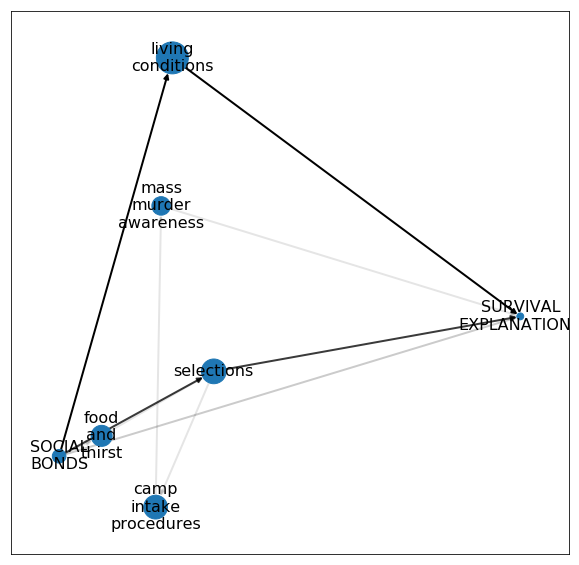

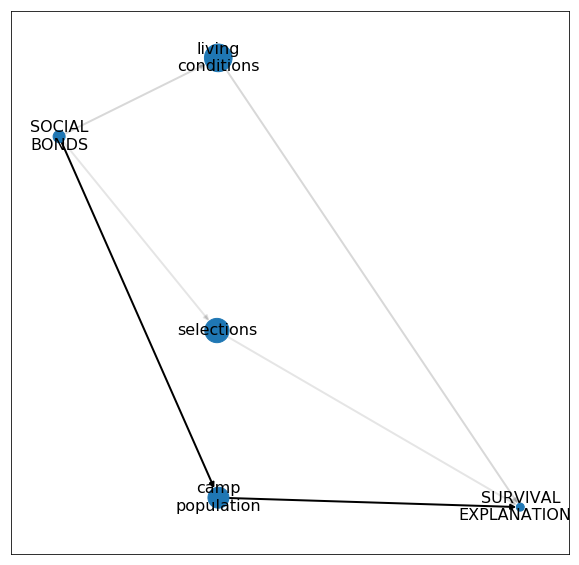

In [422]:
story_start = 'social bonds'
story_end = 'survival explanations'
flux = 0.17
res=visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

### Quantitative evdience 3

The probability that survival explanations follow friends and social relations is higher for women.

0
1


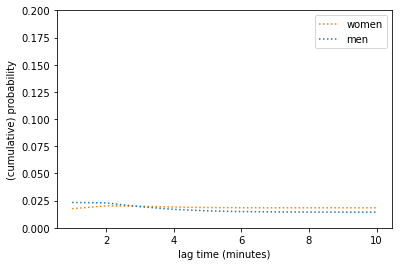

In [423]:
_msmlags = np.arange(1, 11)

topic_1 = ["social bonds","friends"]
topic_2  = ['survival explanations','survival']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)
plt.savefig('Figure_4_social_relations_friends_following_survival_explanations.png')

0
1


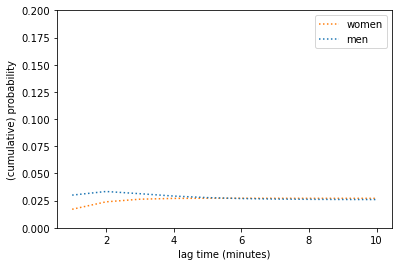

In [424]:
_msmlags = np.arange(1, 11)

topic_1 = ["aid giving","food sharing"]
topic_2  = ['survival explanations','survival']
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)
plt.savefig('Figure_4_aid_giving_food sharing_following_survival_explanations.png')

## Observation 9

### Qualitative description

The moment when one particularly needed the help of others was the selection, when the ill and those who were unable to work were selected to be sent to gas chambers. In testimonies we can often read that victims helped each other in these moments (for instance by hiding or holding the ill); yet victims attribute their survival of selections to the help of their peers and friends. This narrative frame corresponds to the following narrative pathways:
- selections-social relations-survival explanations <br/>
- selections-friends-survival explanations <br/>
- selections-aid giving-survival explanations <br/>

These narrative pathways are more significant in testimonies of women than men.

In case of women:

selections-aid giving-survival explanations:1.372566897382252 <br/>
selections-social relations-survival explanations:0.8517907825853956 <br/>
selections-friends-survival explanations:0.4084233290441179 <br/>

In case of men:

selections-aid giving-survival explanations:0.9130792244020753 <br/>
selections-friends-survival explanations: 0.22597524390714183 <br/>
no path with social relations <br/>


Men and women are equally likely to connect selection with survival explanations:

selections-survival explanations <br/>
Women: 5.995184312276154 <br/>
Men: 5.573167275281716 <br/>

Similarly, another moment when one needed the help of others was the Appel, again women discuss Appel survivor explanations with friends and social relations as transitionary topics:

Appell-social relations-survival explanations:1.2750393765030372 <br/>
Appell-friends-survival explanations:0.35100749020630817 <br/>


### Quantitative evidence 1

In [425]:
story_start = 'selections'
story_end = 'survival explanations'
flux = 1
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [426]:
print_paths(flux_w,max_length=4)

selections-camp intake procedures-living conditions-survival explanations:6.1798768916225555


selections-survival explanations:6.012392264272672


selections-mass murder awareness-survival explanations:3.821233822393223


selections-family-survival explanations:3.704991816598881


selections-adaptation methods-survival explanations:3.062221484796594


selections-transfer-survival explanations:2.686481007887455


selections-loved ones' contacts-survival explanations:2.527246034870191


selections-camp population-survival explanations:2.4031150755285786


selections-Mengele, Josef-survival explanations:2.1838806955982615


selections-camp intake procedures-tattoo-survival explanations:2.0731534915489416


selections-living conditions-food and thirst-survival explanations:1.9578345617924293


selections-aid giving-survival explanations:1.9146117786915926


selections-perpetrators-survival explanations:1.4924410833441428


selections-departure-survival explanations:1.4431184396378038


se

In [427]:
print_paths(flux_m,max_length=3)

selections-survival explanations:6.168326588772167


selections-family-survival explanations:3.2777672213080633


selections-camp population-survival explanations:3.132429788923187


selections-transfer-survival explanations:3.0405897936761708


selections-loved ones' fates-survival explanations:2.9537258521876613


selections-departure-survival explanations:2.6227588604335432


selections-mass murder awareness-survival explanations:1.4553940087399604


selections-aid giving-survival explanations:1.3604577096243577


selections-Mengele, Josef-survival explanations:1.3501409525404828


selections-psychological reactions-survival explanations:1.1500144255489848


selections-adaptation methods-survival explanations:1.1315973191484123


selections-hiding and evasion-survival explanations:1.0380329899987828


selections-killings-survival explanations:0.9918209932419607


selections-medical care-survival explanations:0.8073838819613955


selections-loved ones' contacts-survival explanations:

In [428]:
print_similar_paths(flux_w,flux_m)

selections-family-survival explanations
Women: 3.704991816598881
Men: 3.2777672213080633


selections-camp intake procedures-living conditions-survival explanations
Women: 6.1798768916225555
Men: 5.615499069397801


selections-camp intake procedures-tattoo-survival explanations
Women: 2.0731534915489416
Men: 3.9096373764968453


selections-mass murder awareness-survival explanations
Women: 3.821233822393223
Men: 1.4553940087399604


selections-hiding and evasion-survival explanations
Women: 0.7824726883177239
Men: 1.0380329899987828


selections-warnings-survival explanations
Women: 0.2553350821394494
Men: 0.1595826282624872


selections-departure-survival explanations
Women: 1.4431184396378038
Men: 2.6227588604335432


selections-camp population-survival explanations
Women: 2.4031150755285786
Men: 3.132429788923187


selections-living conditions-diseases-survival explanations
Women: 0.6784142898152566
Men: 0.6672158920091867


selections-transfer-survival explanations
Women: 2.6864810

In [429]:
story_start = 'Appell'
story_end = 'survival explanations'
flux = 1
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [430]:
print_paths(flux_w,max_length=4)

Appell-living conditions-survival explanations:6.187084084463604


Appell-living conditions-selections-survival explanations:5.562578197561248


Appell-mass murder awareness-survival explanations:3.8148165308950355


Appell-kapos-survival explanations:3.265042612992883


Appell-survival explanations:3.0689006684574918


Appell-family-survival explanations:3.0459822108830266


Appell-adaptation methods-survival explanations:2.7139045671219324


Appell-camp population-survival explanations:2.500301213525199


Appell-forced labor-aid giving-survival explanations:2.3537672902880193


Appell-food and thirst-survival explanations:1.9869408500400971


Appell-food and thirst-family-survival explanations:1.7009528160825622


Appell-violence-survival explanations:1.1290007122331907


Appell-diseases-survival explanations:1.0749506528208175


Appell-psychological reactions-survival explanations:1.0697215511102218


Appell-medical care-survival explanations:1.056454381279813


Appell-killings-surv

In [431]:
print_paths(flux_m,max_length=3)

Appell-living conditions-survival explanations:5.617525512682105


Appell-camp population-survival explanations:4.7511194585490815


Appell-food and thirst-survival explanations:4.638618863682865


Appell-forced labor-survival explanations:3.641916698564699


Appell-kapos-survival explanations:3.1186547991210216


Appell-killings-survival explanations:2.6725436309263193


Appell-psychological reactions-survival explanations:2.2107280972492815


Appell-survival explanations:1.025388166411276


Appell-religion-survival explanations:0.9347271078085141




In [432]:
print_similar_paths(flux_w,flux_m)

Appell-survival explanations
Women: 3.0689006684574918
Men: 1.025388166411276


Appell-violence-selections-camp intake procedures-living conditions-diseases-survival explanations
Women: 1.223925176912572
Men: 1.6582033954642532


Appell-food and thirst-survival explanations
Women: 1.9869408500400971
Men: 4.638618863682865


Appell-killings-survival explanations
Women: 1.0104949305193403
Men: 2.6725436309263193


Appell-living conditions-survival explanations
Women: 6.187084084463604
Men: 5.617525512682105


Appell-camp population-survival explanations
Women: 2.500301213525199
Men: 4.7511194585490815


Appell-kapos-survival explanations
Women: 3.265042612992883
Men: 3.1186547991210216


Appell-psychological reactions-survival explanations
Women: 1.0697215511102218
Men: 2.2107280972492815




### Visualization

7 labels to show
7 labels to show


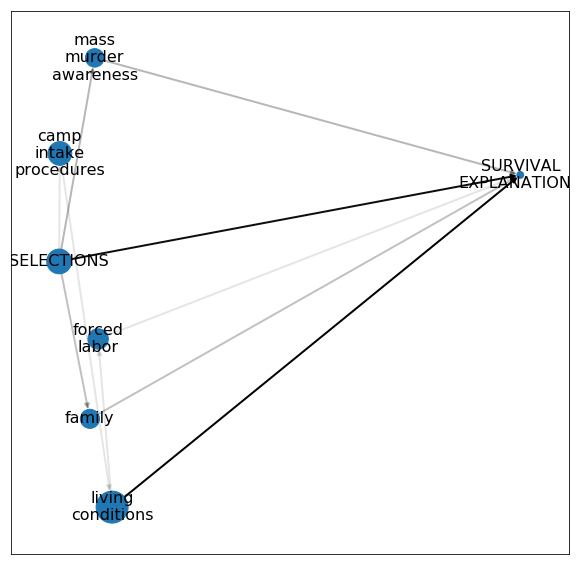

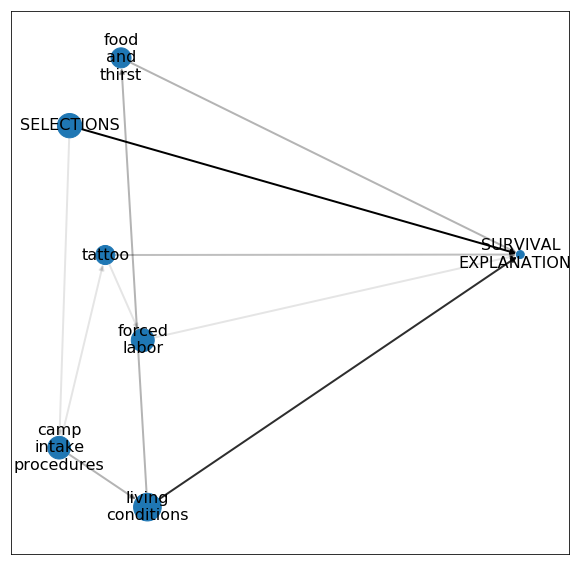

In [433]:
flux = 0.2
res = visualize_most_important_paths(data_set_1_w,flux,features_df,['selections'],story_end,None)
res=visualize_most_important_paths(data_set_1_m,flux,features_df,['selections'],story_end,None)

## Observation 10

### Qualitative description

Social relations and aid giving are closely connected in narratives of both men and women; (slightly more connected for men). For women, the most important transitionary topic is living conditions and selection, for men it is forced labor.

social relations-forced labor-aid giving <br/>
Women: 2.8948768437334533 <br/>
Men: 6.7009466811388885 <br/>


social relations-living conditions-aid giving <br/>
Women: 3.2443759794384 <br/>
Men: 1.9733942618306775 <br/>


### Quantitative evidence

In [434]:
flux = 1
story_start = 'social bonds'
story_end = 'aid giving'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [435]:
print_paths(flux_w,max_length=3)

social bonds-living conditions-aid giving:7.358807224909449


social bonds-aid giving:6.179836390093809


social bonds-forced labor-aid giving:4.929611825853947


social bonds-camp population-aid giving:4.370247442816215


social bonds-family-aid giving:3.6394909882528013


social bonds-kapos-aid giving:3.2025709229160033


social bonds-adaptation methods-aid giving:3.1261758929259016


social bonds-departure-aid giving:2.857099358228596


social bonds-transfer-aid giving:2.4656864105524994


social bonds-mass murder awareness-aid giving:2.4270746522245346


social bonds-physical condition-aid giving:1.3516345855979002


social bonds-violence-aid giving:1.3068198324028277


social bonds-psychological reactions-aid giving:1.3055482340036726


social bonds-medical care-aid giving:1.0391524157040837


social bonds-diseases-aid giving:0.9866543895652142


social bonds-punishments-aid giving:0.9784628143915163


social bonds-religion-aid giving:0.7491819996057092


social bonds-childbearing

In [436]:
print_paths(flux_m,max_length=3)

social bonds-aid giving:9.587700411431637


social bonds-forced labor-aid giving:5.764637837660577


social bonds-camp population-aid giving:4.7327955684550505


social bonds-living conditions-aid giving:4.668833023552489


social bonds-adaptation methods-aid giving:4.117032725696326


social bonds-mass murder awareness-aid giving:2.411965010920133


social bonds-family-aid giving:1.7907779774021668


social bonds-killings-aid giving:1.4791415061246609


social bonds-medical care-aid giving:1.2373357760301011


social bonds-psychological reactions-aid giving:1.076174012346082


social bonds-covert activities-aid giving:0.9970866380280073


social bonds-barter-aid giving:0.6732351560293361


social bonds-diseases-aid giving:0.6655677466850891


social bonds-camp cultural activities-aid giving:0.5451390557855073


social bonds-attitudes-aid giving:0.2697178106313093


social bonds-betrayals-aid giving:0.26390259716813846


social bonds-contact-aid giving:0.19229727465552207


social bond

In [437]:
print_similar_paths(flux_w,flux_m)

social bonds-diseases-aid giving
Women: 0.9866543895652142
Men: 0.6655677466850891


social bonds-aid giving
Women: 6.179836390093809
Men: 9.587700411431637


social bonds-camp population-aid giving
Women: 4.370247442816215
Men: 4.7327955684550505


social bonds-living conditions-aid giving
Women: 7.358807224909449
Men: 4.668833023552489


social bonds-family-aid giving
Women: 3.6394909882528013
Men: 1.7907779774021668


social bonds-adaptation methods-aid giving
Women: 3.1261758929259016
Men: 4.117032725696326


social bonds-departure-aid giving
Women: 2.857099358228596
Men: 0.013588665629259346


social bonds-psychological reactions-aid giving
Women: 1.3055482340036726
Men: 1.076174012346082


social bonds-medical care-aid giving
Women: 1.0391524157040837
Men: 1.2373357760301011


social bonds-forced labor-aid giving
Women: 4.929611825853947
Men: 5.764637837660577


social bonds-camp cultural activities-aid giving
Women: 0.32849734916755
Men: 0.5451390557855073


social bonds-killing

### Visualize

7 labels to show
4 labels to show


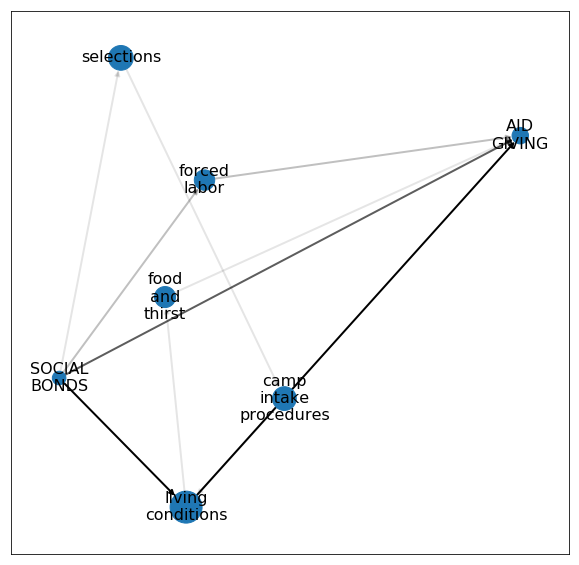

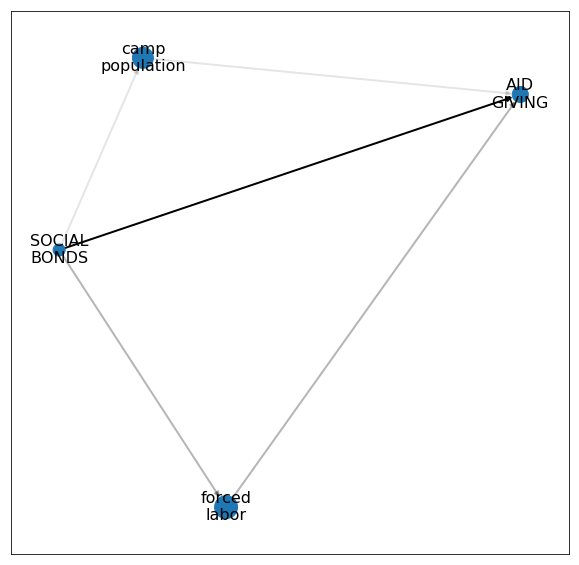

In [438]:
story_start = ['social bonds']
story_end = ['aid giving']
res = visualize_most_important_paths(data_set_1_w,0.2,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m,0.2,features_df,story_start,story_end,None)

## Observation 11

### Qualitative description

Friendship and aid giving are closely connected in narratives of women and they are not closely connected in narratives of men.

friends-selections-aid giving
Women: 5.427121616259672
Men: 0.11639422393786059


friends-aid giving
Women: 1.9789089838040406
Men: 0.4285773765946193


### Quantitative evidence

flux = 1
story_start = 'friends'
story_end = 'aid giving'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

print_paths(flux_w,max_length=3)

print_paths(flux_m,max_length=3)

print_similar_paths(flux_w,flux_m,max_length=3)

### Visualize

flux = 0.15
story_start = ['friends']
story_end = ['aid giving']
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

### Quantitative evidence 3

The probability that aid giving follow friends and social relations is higher for women.

_msmlags = np.arange(1, 11)

topic_1 = ["friends","social relations"]
topic_2= ['aid giving']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 13

### Qualitative description

In narratives of those men and women who did not work, friendship and survival explanations are more connected for women

### Quantitative evidencw

flux = 0.6
story_start = 'friends'
story_end = 'survival explanations'
flux_w = calculate_flux(data_set_1_w_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)



print_similar_paths(flux_w,flux_m)


story_start = ['friends']
story_end = ['survival explanations']
flux = 0.2
res = visualize_most_important_paths(data_set_1_w_not_w,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m_not_w,flux,features_df,story_start,story_end,None)

### Quantitative evidence 3

The probability that aid giving follow friends and social relations is higher for women.

_msmlags = np.arange(1, 11)

topic_1 = ["friends","social relations"]
topic_2= ['survival explanations']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w_not_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m_not_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 14 A

### Qualitative description

In narratives of those men and women who did not work, social relations and living conditions are much more connected for women:

living conditions - social relations

For women 9.9% of total traffic is going through this path, whereas for men, it is 5.8%.

The following transitionary topics are present both in testimonies of women and men but with different weights:

living conditions-aid giving-social relations <br/>
Women: 1.3274897627391509 <br/>
Men: 0.6744181635044657 <br/>

living conditions-friends-social relations <br/>
Women: 0.8305450841970277 <br/>
Men: 0.522043120093434 <br/>

living conditions-Blockälteste-social relations <br/>
Women: 1.151697967923542 <br/>
Men: 0.751131993867747 <br/>

living conditions-hunger-social relations <br/>
Women: 0.3749064709578037 <br/>
Men: 1.02338128352873 <br/>

### Quantitative evidence

In [439]:
flux = 0.6
story_start = 'living conditions'
story_end = 'social bonds'
flux_w = calculate_flux(data_set_1_w_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)



In [440]:
print_similar_paths(flux_w,flux_m)

living conditions-selections-camp intake procedures-social bonds
Women: 2.275405122328532
Men: 3.622137667200289


living conditions-food and thirst-social bonds
Women: 7.606537023499842
Men: 8.932109149719441


living conditions-Appell-social bonds
Women: 3.3137592055945686
Men: 2.5043058524060275


living conditions-family-social bonds
Women: 2.8438965020506455
Men: 2.757203807273762


living conditions-clothing-social bonds
Women: 1.8806821770113962
Men: 1.2697875811030197


living conditions-mass murder awareness-social bonds
Women: 3.368615461254768
Men: 1.886542322047484


living conditions-camp population-social bonds
Women: 3.338828951499205
Men: 3.5883229284711176


living conditions-adaptation methods-social bonds
Women: 2.31602119525416
Men: 3.4797362750324696


living conditions-violence-social bonds
Women: 1.9862495025928362
Men: 2.4840374678292396


living conditions-aid giving-social bonds
Women: 2.0528696220367593
Men: 1.7259380328255973


living conditions-social bonds

3 labels to show
3 labels to show


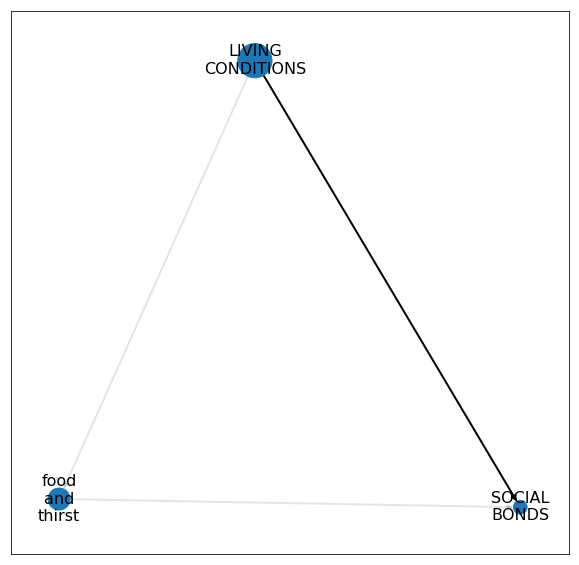

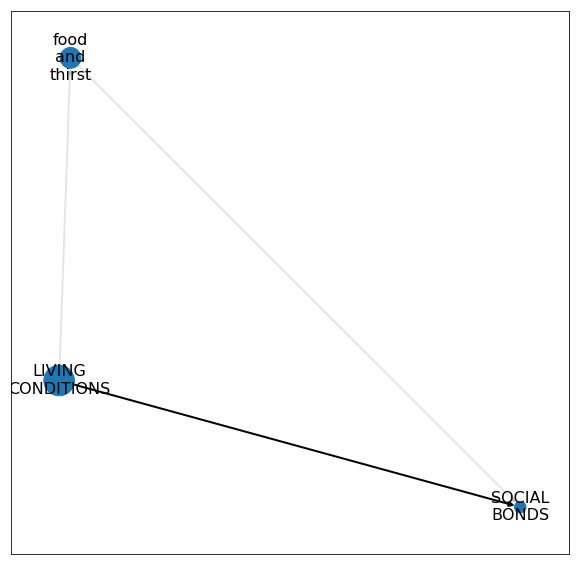

In [441]:

story_start = ['living conditions']
story_end = ['social bonds']
flux = 0.2
res = visualize_most_important_paths(data_set_1_w_not_w,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m_not_w,flux,features_df,story_start,story_end,None)

### Quantitative evidence 3

The probability that friends and social relations follow living conditions is higher for women who did not work.

0
1


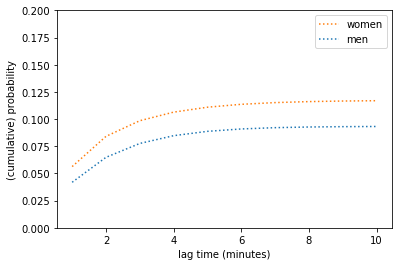

In [442]:
_msmlags = np.arange(1, 11)

topic_2 = ["friends","social bonds"]
topic_1= ['living conditions']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w_not_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m_not_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 14

### Qualitative description

In narratives of those men and women who did not work, friendship and living conditions are much more connected for women:

friends-living conditions

For women 6.7% of total traffic is going through this path, whereas for men, it is 1.5%.

In case of women, the main transitionary topics include:


friends-aid giving-living conditions:1.1352997404787295

friends-Blockälteste-living conditions:0.9866599269050341

friends-food-living conditions:2.8081658495238724


### Quantitative evidence

flux = 1
story_start = 'friends'
story_end = 'living conditions'
flux_w = calculate_flux(data_set_1_w_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

print_paths(flux_w,max_length=3)

print_paths(flux_m,max_length=3)

print_similar_paths(flux_w,flux_m)


story_start = ['friends']
story_end = ['living conditions']
flux = 0.2
res = visualize_most_important_paths(data_set_1_w_not_w,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m_not_w,flux,features_df,story_start,story_end,None)

### Quantitative evidence 3


_msmlags = np.arange(1, 11)

topic_1 = topic_map_living_conditions
topic_2= ['friends']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w_not_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m_not_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 14 B

### Qualitative description

In narratives of those men and women who did not work, aid giving and living conditions are much more connected for women:

living conditions - aid giving

For women 7.4% of total traffic is going through this path, whereas for men, it is 3.36%.

### Quantitative evidence

In [443]:
flux = 0.3
story_start = 'living conditions'
story_end = 'aid giving'
flux_w = calculate_flux(data_set_1_w_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)



In [444]:
print_similar_paths(flux_w,flux_m)

living conditions-food and thirst-aid giving
Women: 5.611618793252272
Men: 4.042016365475051


living conditions-kapos-aid giving
Women: 4.151661520655968
Men: 3.5975206531138855


living conditions-aid giving
Women: 12.448020541811836
Men: 10.747865847926754




### Visualization

5 labels to show
6 labels to show


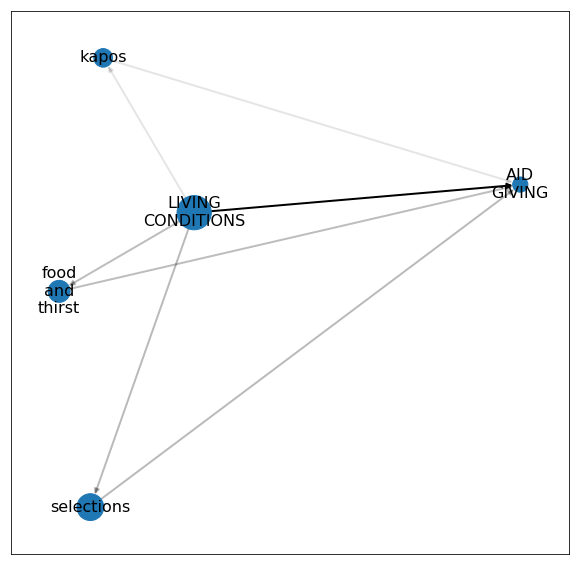

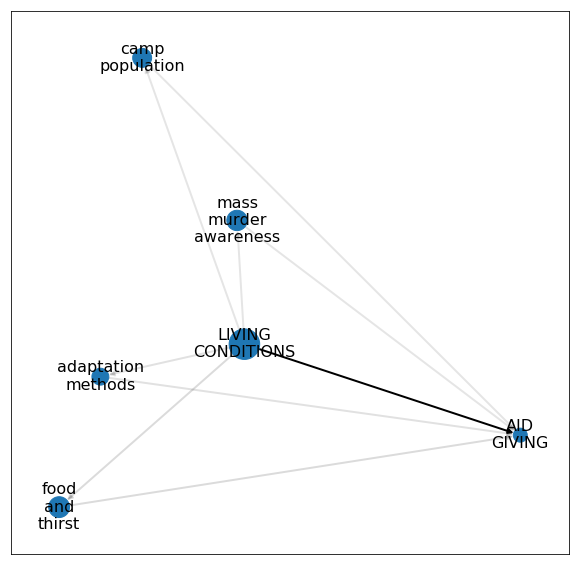

In [445]:
story_start = ['living conditions']
story_end = ['aid giving']
flux = 0.25
res = visualize_most_important_paths(data_set_1_w_not_w,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m_not_w,flux,features_df,story_start,story_end,None)

### Quantitative evidence 3

The probability that aid giving follows living condiions is higher for women.

0
1


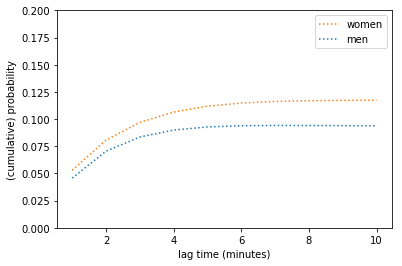

In [446]:




_msmlags = np.arange(1, 11)

topic_1 = topic_map_living_conditions
topic_2= ['aid giving']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w_not_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m_not_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 15

### Qualitative description

In narratives of those men and women who did not work, aid giving and survival explanations are much more connected for women:

aid giving-survival explanations


For women 1.8% of total traffic is going through this path, whereas for men, it is 0.7753%.

### Quantitative evidence

In [447]:
flux = 0.8
story_start = 'aid giving'
story_end = 'survival explanations'
flux_w = calculate_flux(data_set_1_w_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)



In [448]:
print_similar_paths(flux_w,flux_m)

aid giving-survival explanations
Women: 3.5824515118064246
Men: 1.0177478503575759




### Visualize it

6 labels to show
6 labels to show


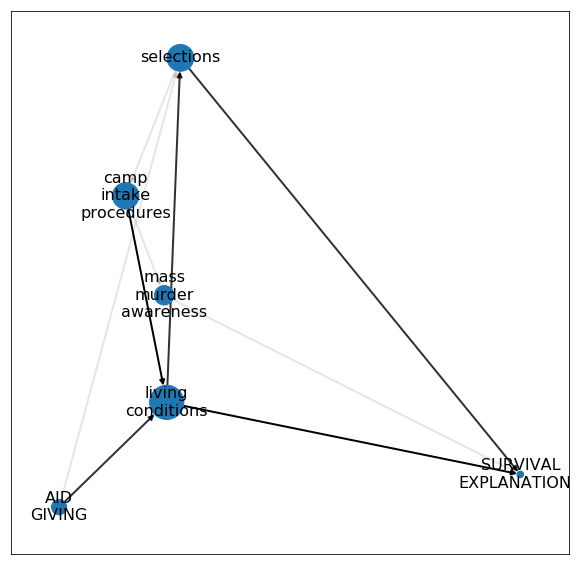

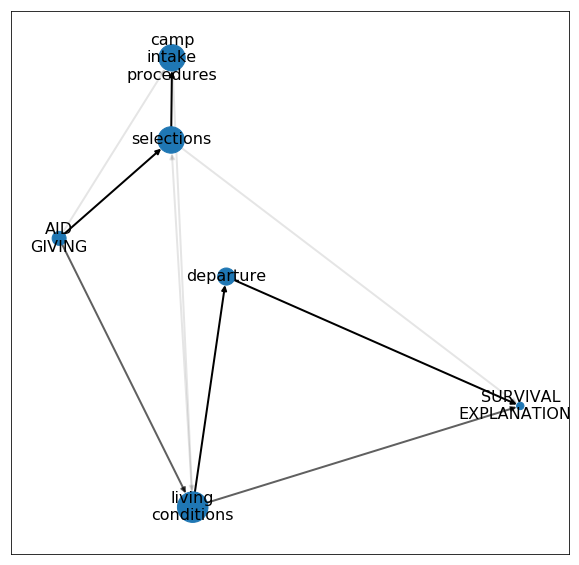

In [449]:
story_start = ['aid giving']
story_end = ['survival explanations']
flux = 0.15
res = visualize_most_important_paths(data_set_1_w_not_w,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m_not_w,flux,features_df,story_start,story_end,None)

### Quantitative evidence 3

0
1


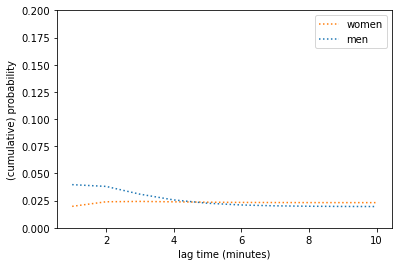

In [450]:




_msmlags = np.arange(1, 11)

topic_2 = ['survival explanations']
topic_1= ['aid giving']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w_not_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m_not_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 16

### Qualitative description

In narratives of those men and women who worked, aid giving and survival explanations are  more connected for men:

aid giving-survival explanations


For women 2.6% of total traffic is going through this path, whereas for men, it is 3.39%.

But in case of women, there are a number of short non-directs paths:

aid giving-social relations-survival explanations:1.5957266441234774

aid giving-diseases-survival explanations: 1.2137559365334227

aid giving-friends-survival explanations:0.8478423026431587

aid giving-food-survival explanations:2.105173850686586




### Quantitative evidence

In [451]:
flux = 1
story_start = 'aid giving'
story_end = 'survival explanations'
flux_w = calculate_flux(data_set_1_w_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [452]:
print_paths(flux_w,max_length=3)

aid giving-forced labor-survival explanations:7.84796178918104


aid giving-family-survival explanations:3.655854049158862


aid giving-survival explanations:2.9693063264978696


aid giving-adaptation methods-survival explanations:2.7437551567547147


aid giving-medical care-survival explanations:2.6408967701939137


aid giving-kapos-survival explanations:2.4507615461615324


aid giving-social bonds-survival explanations:2.4013363831648116


aid giving-perpetrators-survival explanations:2.2739878019304314


aid giving-food and thirst-survival explanations:2.236734404292278


aid giving-camp population-survival explanations:1.918888458194028


aid giving-transfer-survival explanations:1.776178493983266


aid giving-loved ones' contacts-survival explanations:1.7559998431949349


aid giving-departure-survival explanations:1.7253210898413434


aid giving-killings-survival explanations:1.0381116298244455


aid giving-deaths-survival explanations:0.948402895612446


aid giving-attitudes-surv

In [453]:
print_paths(flux_m,max_length=3)

aid giving-survival explanations:9.05787658546978


aid giving-forced labor-survival explanations:5.7121365210286035


aid giving-selections-survival explanations:4.667938545039664


aid giving-living conditions-survival explanations:4.636109333400312


aid giving-camp population-survival explanations:4.090943532491429


aid giving-kapos-survival explanations:2.431353516498071


aid giving-medical care-survival explanations:2.013959903955122


aid giving-killings-survival explanations:1.693640962109082


aid giving-punishments-survival explanations:1.488014673388104


aid giving-perpetrators-survival explanations:1.4837740354271614


aid giving-family-survival explanations:1.4451286006824733


aid giving-loved ones' fates-survival explanations:1.3322429050194569


aid giving-loved ones' contacts-survival explanations:1.3187328543317047


aid giving-hiding and evasion-survival explanations:1.1797429656681175


aid giving-resistance-survival explanations:1.0995857611716253


aid giving-p

In [454]:
print_similar_paths(flux_w,flux_m)

aid giving-family-survival explanations
Women: 3.655854049158862
Men: 1.4451286006824733


aid giving-camp population-survival explanations
Women: 1.918888458194028
Men: 4.090943532491429


aid giving-perpetrators-survival explanations
Women: 2.2739878019304314
Men: 1.4837740354271614


aid giving-preferential treatment-survival explanations
Women: 0.7692446221706057
Men: 0.5172752130331503


aid giving-survival explanations
Women: 2.9693063264978696
Men: 9.05787658546978


aid giving-medical care-survival explanations
Women: 2.6408967701939137
Men: 2.013959903955122


aid giving-loved ones' contacts-survival explanations
Women: 1.7559998431949349
Men: 1.3187328543317047


aid giving-hiding and evasion-survival explanations
Women: 0.502062329727306
Men: 1.1797429656681175


aid giving-kapos-survival explanations
Women: 2.4507615461615324
Men: 2.431353516498071


aid giving-forced labor-survival explanations
Women: 7.84796178918104
Men: 5.7121365210286035


aid giving-killings-survival 

### Visualize

9 labels to show
7 labels to show


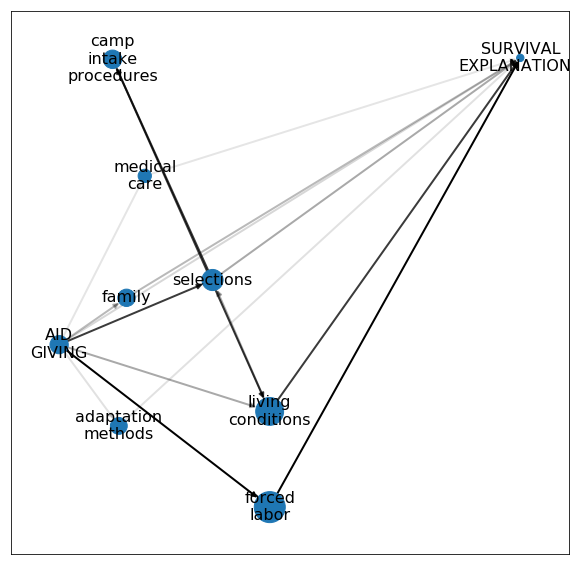

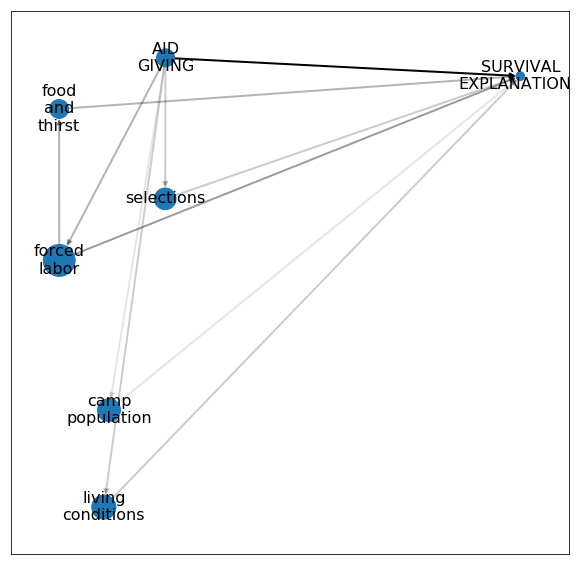

In [455]:

story_start = ['aid giving']
story_end = ['survival explanations']
flux = 0.3
res = visualize_most_important_paths(data_set_1_w_work,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m_work,flux,features_df,story_start,story_end,None)

### Quantitative evidence 3

The probability that aid giving follows survival explanations is higher for men.

0
1


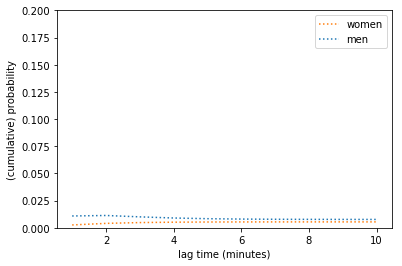

In [456]:




_msmlags = np.arange(1, 11)

topic_1 = ['survival explanations']
topic_2= ['aid giving']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w_work, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m_work, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 17

### Qualitative descriptions

In narratives of those men and women who worked, social relations and survival explanations are  more connected for women:

social relations-survival explanations


For women 4.7% of total traffic is going through the path above;  for men 2.5% is going through this path.

A key path with transitory topic for men includes:

social relations-aid giving-survival explanations
2.50368892717799

Key paths with transitory topics for women includes:

social relations-living conditions-survival explanations:2.9110184744683765

social relations-preferential treatment-survival explanations:0.8644349360585929


social relations-friends-survival explanations:0.7264439886153188


### Quantitative evidence

In [457]:
flux = 1
story_start = 'social bonds'
story_end = 'survival explanations'
flux_w = calculate_flux(data_set_1_w_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [458]:
print_paths(flux_w,max_length=3)

social bonds-forced labor-survival explanations:7.802192091080584


social bonds-living conditions-survival explanations:6.442501149866947


social bonds-selections-survival explanations:5.369102782385388


social bonds-survival explanations:4.734650491646939


social bonds-family-survival explanations:2.878815316779314


social bonds-adaptation methods-survival explanations:2.5671461052235993


social bonds-suicides-survival explanations:0.6174518853223558


social bonds-testimony sharing-survival explanations:0.3766960684675332


social bonds-transfer-survival explanations:0.3083976246805845




In [459]:
print_paths(flux_m,max_length=3)

social bonds-camp population-survival explanations:7.625289384538905


social bonds-aid giving-survival explanations:7.502128014988831


social bonds-food and thirst-survival explanations:4.534766149896347


social bonds-tattoo-survival explanations:4.1560463457812


social bonds-killings-survival explanations:2.613412752478397


social bonds-mass murder-survival explanations:0.7589589477270025


social bonds-physical condition-survival explanations:0.02164886394935666


social bonds-psychological reactions-survival explanations:0.011113449759331909




In [460]:
print_similar_paths(flux_w,flux_m)

### Visualize

5 labels to show
7 labels to show


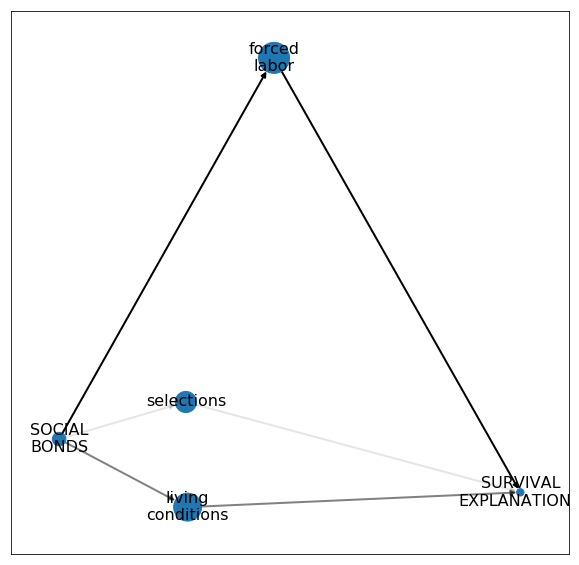

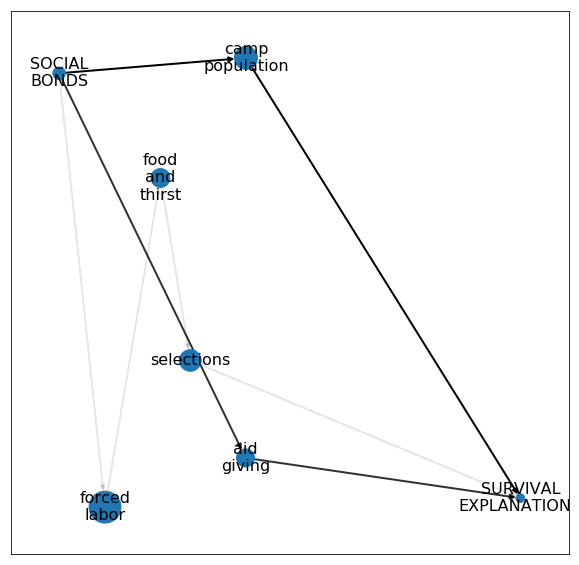

In [461]:

story_start = ['social bonds']
story_end = ['survival explanations']
flux = 0.18
res = visualize_most_important_paths(data_set_1_w_work,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m_work,flux,features_df,story_start,story_end,None)

## Observation 18

### Qualitative description

In narratives of those men and women who worked, social relations and forced labor are more connected for men:

social relations-forced labor
Women: 7.786906600083256
Men: 11.051234286602039

forced labor-social relations
Women: 10.931980703238628
Men: 11.027089792748091



### Quantitative evidence

In [462]:
flux = 1
story_start = 'social bonds'
story_end = 'forced labor'
flux_w = calculate_flux(data_set_1_w_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)



In [463]:
print_similar_paths(flux_w,flux_m,max_length=2)

social bonds-forced labor
Women: 13.827589584160838
Men: 13.843026816594275




In [464]:
flux = 1
story_start = 'forced labor'
story_end = 'social bonds'
flux_w = calculate_flux(data_set_1_w_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [465]:
print_similar_paths(flux_w,flux_m,max_length=2)

forced labor-social bonds
Women: 10.698928437184966
Men: 14.308732065466907




### Visualize 

3 labels to show
3 labels to show


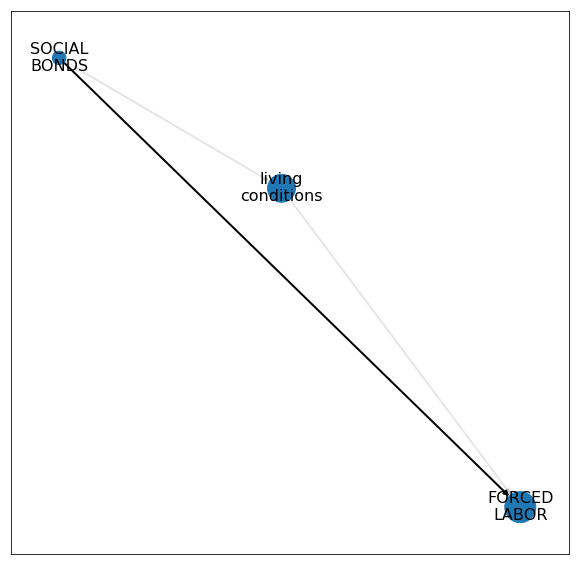

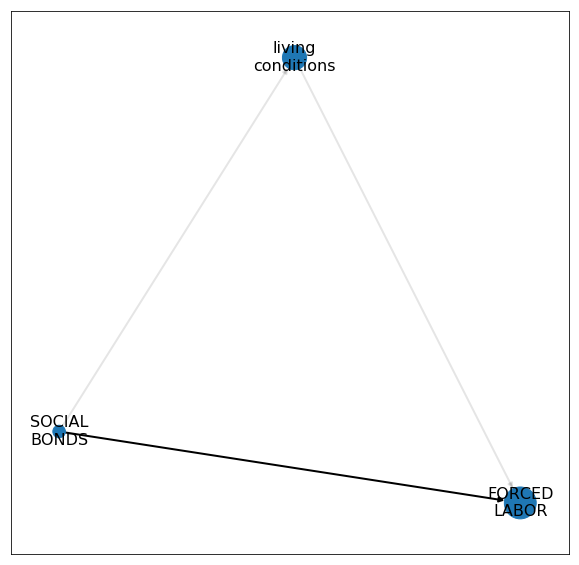

In [466]:

story_start = ['social bonds']
story_end = ['forced labor']
flux = 0.18
res = visualize_most_important_paths(data_set_1_w_work,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m_work,flux,features_df,story_start,story_end,None)

### Quantitative evidence 3

0
1


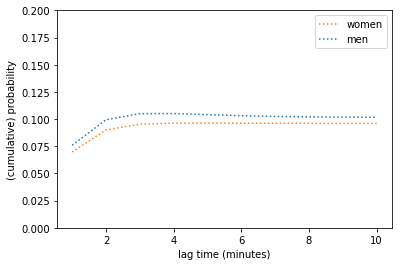

In [467]:




_msmlags = np.arange(1, 11)

topic_1 = ['forced labor']
topic_2= ['social bonds','friends']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w_work, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m_work, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 18 B

### Qualitative description

In narratives of those men and women who worked, friends and living conditions are  more connected  for women than for men:

social relations-living conditions


living conditions-friends
Women: 3.499585921266175
Men: 1.665785919545009

### Quantitative evidence

flux = 0.4
story_start = 'living conditions'
story_end = 'friends'
flux_w = calculate_flux(data_set_1_w_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

print_similar_paths(flux_w,flux_m,max_length=3)

### Visualize


story_start = ['friends']
story_end = ['living conditions']
flux = 0.4
res = visualize_most_important_paths(data_set_1_w_work,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m_work,flux,features_df,story_start,story_end,None)

### Quantitative evidence 3





_msmlags = np.arange(1, 11)

topic_1 = topic_map_living_conditions
topic_2= ['friends']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w_work, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m_work, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 19

### Qualitative description

Forced labor and aid giving are strongly and more or less equally connected for those women and men who worked. Generally, we see a strong connection between forced labor and aid giving.

### Quantitative evidence

In [468]:
flux = 1
story_start = 'forced labor'
story_end = 'aid giving'
flux_w = calculate_flux(data_set_1_w_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [469]:
print_similar_paths(flux_w,flux_m,max_length=2)

forced labor-aid giving
Women: 18.646455719281892
Men: 19.480318096218934




In [470]:
flux = 1
story_start = 'aid giving'
story_end = 'forced labor'
flux_w = calculate_flux(data_set_1_w_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [471]:
print_similar_paths(flux_w,flux_m,max_length=2)

aid giving-forced labor
Women: 12.409605496896015
Men: 15.881921545996974




## Observation 20

### Qualitative description

Living conditions and food sharing are more connected for those women who worked than those men who worked. For instance, for women 6.6% is going through the following paths:

living conditions-food-food sharing

and 3.5% through the following one:

living conditions-food sharing

In testimonies of men, direct path was not found, instead the traffic is going through the following two paths:

living conditions-social relations-food sharing
2 %

living conditions-aid giving-food sharing
1.3 %


### Quantitative evidence

flux = 1
story_start = 'living conditions'
story_end = 'food sharing'
flux_w = calculate_flux(data_set_1_w_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

print_paths(flux_w,max_length=3)

print_paths(flux_m,max_length=3)

print_similar_paths(flux_w,flux_m,max_length=4)

### Quantitative evidence 3





_msmlags = np.arange(1, 11)

topic_1 = ['living conditions']
topic_2= ['food sharing']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w_work, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m_work, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 21

### Qualitative description

Forced labor and food sharing are more connected for men who worked than those women who worked. For instance, for women 13.3% is going through the following paths:

forced labor-food sharing

for men it is 22%

In case of aid giving the difference is slighter:

forced labor-aid giving

for women it is 15.965854319863244

and for men it 16.98


### Quantitative evidence

flux = 0.3
story_start = 'forced labor'
story_end = 'food sharing'
flux_w = calculate_flux(data_set_1_w_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

print_similar_paths(flux_w,flux_m,max_length=2)

flux = 0.3
story_start = 'forced labor'
story_end = 'aid giving'
flux_w = calculate_flux(data_set_1_w_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)


print_similar_paths(flux_w,flux_m,max_length=2)

### Quantitative evidence 3





_msmlags = np.arange(1, 11)

topic_1 = ['forced labor']
topic_2= ['food sharing']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w_work, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m_work, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)





_msmlags = np.arange(1, 11)

topic_1 = ['forced labor']
topic_2= ['aid giving']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w_work, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m_work, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 22

### Qualitative description

Those men who did not work are more likely to connect stealing and camp living conditions.

### Quantitative evidence

In [472]:
flux = 0.2
story_start = 'living conditions'
story_end = 'stealing'
flux_w = calculate_flux(data_set_1_w_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [473]:
print_similar_paths(flux_w,flux_m)

living conditions-stealing
Women: 10.630491847810529
Men: 27.64207111726352




In [474]:
flux = 0.2
story_start = 'stealing'
story_end = 'living conditions'
flux_w = calculate_flux(data_set_1_w_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [475]:
print_similar_paths(flux_w,flux_m)

stealing-food and thirst-living conditions
Women: 5.4111417924702385
Men: 4.180502952993835


stealing-living conditions
Women: 9.34619732962673
Men: 9.650327215226




### Quantitative evidence 3

0
1


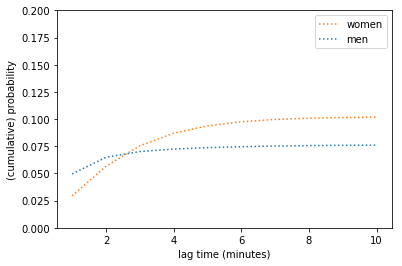

In [476]:




_msmlags = np.arange(1, 11)

topic_1 = ['living conditions']
topic_2= ['stealing']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 23

### Qualitative description

In narratives of women, preferential treatment is more likely to lead to survival explanation.

### Quantitative evidence

In [477]:
flux = 1
story_start = 'preferential treatment'
story_end = 'survival explanations'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [478]:
print_paths(flux_w,max_length=2)

preferential treatment-survival explanations:3.114495155531689




In [479]:
print_paths(flux_m,max_length=2)

preferential treatment-survival explanations:0.9552848233888186




### Quantitative evidence 3

0
1


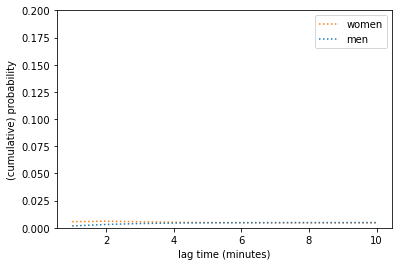

In [480]:




_msmlags = np.arange(1, 11)

topic_1 = ['preferential treatment']
topic_2= ['survival explanations']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 24 A

### Qualitative description

In narratives of women, preferential treatment is more likely to be preceded by living conditions:

living conditions-preferential treatment
Women: 3.267726057364454
Men: 1.9161261348630667



### Quantitative evidence

In [481]:
flux = 1
story_start = 'living conditions'
story_end = 'preferential treatment'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [482]:
print_similar_paths(flux_w,flux_m)

living conditions-Appell-preferential treatment
Women: 1.102148324711846
Men: 0.7835015061520992


living conditions-medical experiments-preferential treatment
Women: 0.36429704189187195
Men: 0.3152600443339041


living conditions-medical care-preferential treatment
Women: 0.8913725379706267
Men: 0.5841268054683213


living conditions-forced labor-preferential treatment
Women: 6.029337401488795
Men: 6.45498262933151


living conditions-food and thirst-preferential treatment
Women: 2.368937446561765
Men: 1.5738643933788954


living conditions-perpetrators-preferential treatment
Women: 1.7071207057461368
Men: 1.4815849103222067


living conditions-tattoo-forced labor-preferential treatment
Women: 1.4723391452103247
Men: 3.1473138189129513


living conditions-killings-preferential treatment
Women: 0.521980298984431
Men: 1.008175351412268


living conditions-children-preferential treatment
Women: 0.37386001619608406
Men: 0.41019987494282767


living conditions-psychological reactions-prefe

### Quantitative evidence 3

0
1


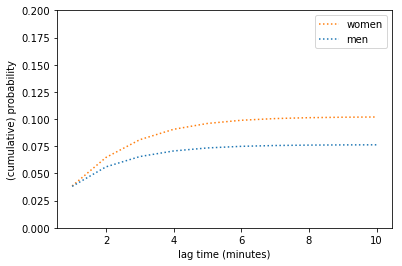

In [483]:




_msmlags = np.arange(1, 11)

topic_1 = ['living conditions']
topic_2= ['preferential treatment']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)

## Observation 24

### Qualitative description

In narratives of women, Blockalteste is more connected to survival explanations;

Blockälteste-survival explanations
Women: 1.5644480047580056
Men: 0.8118622824526782

### Quantitative evidence

flux = 1
story_start = 'Blockälteste'
story_end = 'survival explanations'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

print_paths(flux_w,max_length=3)

print_paths(flux_m,max_length=3)

print_similar_paths(flux_w,flux_m)

### Quantitative evidence 3





_msmlags = np.arange(1, 11)

topic_2 = ['survival explanations']
topic_1= ['Blockälteste']
# further, exclude topics that are not in active set
probs_w, probs_m = np.zeros((_msmlags.shape[0], 2)), np.zeros((_msmlags.shape[0], 2))
for n, lag in enumerate(_msmlags):
    probs_w[n] = get_inoutgoing_probabilities(data_set_1_w, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    probs_m[n] = get_inoutgoing_probabilities(data_set_1_m, topic_2, topic_1, 
                                              n_lag=lag, reduce_to_active=True)
    
plot_inoutgoing_probabilities(probs_w, probs_m)